In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas
import os
import pingouin
import datapungibea as dpb
from matplotlib.patches import ArrowStyle
import copy
from matplotlib.backends.backend_pdf import PdfPages
import networkx as nx
from pgmpy.estimators import PC
import statsmodels.api as sm
import plotly.express as px
from sklearn.linear_model import LinearRegression
import seaborn as sns
import random
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import mean_squared_error, accuracy_score
from statsmodels.discrete.discrete_model import Logit
from networkx.drawing.nx_agraph import graphviz_layout
from collections import defaultdict
import math
import statsmodels.formula.api as smf
%matplotlib inline
from statsmodels.tsa.api import VAR
from linearmodels.panel import PanelOLS
from linearmodels import PanelOLS
import linearmodels as plm
from itertools import combinations

/Users/abiodun.idowu/anaconda3/lib/python3.11/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [123]:
from abbeyFunctions import graph_DAG, create_cluster_dags, determine_p_value, graph_DAG_cluster, get_edges_dict, get_col_shared_edges, get_row_shared_edges, plot_shared_edges, plot_shared_col_edges, plot_shared_row_edges, hausman_test

In [3]:
ai_data_nominal = pd.read_csv('nominal_data.csv')

In [4]:
ai_data_nominal = ai_data_nominal.set_index(['FIPS_y', 'TimePeriod'])

In [5]:
exclude_vars = ['M4 I','RM4I', 'unem']  # List of variables to exclude

# Create a dictionary to store the dataframes
ai_dct = {"logged_n": ai_data_nominal.copy(),
          "rates_n": ai_data_nominal.copy(),
         "percent rates_n": ai_data_nominal.copy()}

        
for col in ai_dct['logged_n'].columns:
    if col not in exclude_vars:
        ai_dct["logged_n"][col] = np.log(ai_data_nominal[col]).replace([np.inf, -np.inf], np.nan)


# Calculate rate of change (differences of log-transformed values)
for col in ai_dct['rates_n'].columns:
    if col not in exclude_vars:
        ai_dct["rates_n"][col] = ai_dct["logged_n"].groupby('FIPS_y')[col].diff().dropna()
                
        
        # Calculate percent rate of change
for col in ai_dct['percent rates_n'].columns:
    #if col not in exclude_vars:
        ai_dct["percent rates_n"][col] = ai_dct["rates_n"].groupby('FIPS_y')[col].diff().dropna()


/Users/abiodun.idowu/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [6]:
diff_nominal = ai_dct['percent rates_n']

In [7]:
diff_nominal.drop(columns=['All ', 'Neig'], inplace=True)

In [8]:
diff_nominal = diff_nominal.rename(columns={'M4_y': 'M4', 'M4 I':'M4I'})

In [9]:
ai_df_diffnom = pd.read_csv('diff_nominal_kml3d.csv')

In [10]:
level_12 = ai_df_diffnom

In [11]:
dfg_ai12 = diff_nominal.dropna()

In [12]:
ai_merge12 = pd.merge(dfg_ai12, level_12[['FIPS_y', 'clusters']], on='FIPS_y', how='left')

In [13]:
kml3d_ai_level12 = ai_merge12.dropna()

In [14]:
kml3d_ai_level12 = kml3d_ai_level12.set_index(['FIPS_y'])

In [15]:
cluster_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4}

In [16]:
kml3d_ai_level12['clusters'].replace(cluster_mapping, inplace=True)

In [17]:
ndr_13 = kml3d_ai_level12

In [18]:
ndr_13.columns

Index(['Agri', 'Mini', 'Util', 'M4', 'M4I', 'unem', 'clusters'], dtype='object')

In [19]:
ndr_13 = ndr_13.rename(columns={'M4_y': 'M4', 'M4 I':'M4I'})

In [20]:
ndr_14 = ndr_13.copy()

In [21]:
ndr_14.drop(columns=['M4', 'M4I'], inplace=True)

In [22]:
ndr_16 = ndr_13.copy()

In [23]:
ndr_16.drop(columns=['unem'], inplace=True)

In [24]:
plot_df5 = diff_nominal.copy()
plot_df6 = diff_nominal.copy()

In [25]:
plot_df4 = diff_nominal.dropna()
plot_df5.drop(columns=['M4', 'M4I'], inplace=True)
plot_df6.drop(columns=['unem'], inplace=True)

In [26]:
plot_df4 = plot_df4.dropna()
plot_df5 = plot_df5.dropna()
plot_df6 = plot_df6.dropna()

  0%|          | 0/4 [00:00<?, ?it/s]

keep control: Util
('Agri', 'M4') ['Util']
('M4', 'unem') []
('unem', 'Mini') []
keep control: Mini
('unem', 'M4I') ['Mini']
keep control: unem
('Mini', 'M4I') ['unem']
keep control: Agri
('Util', 'M4') ['Agri']


  0%|          | 0/2 [00:00<?, ?it/s]

keep control: Agri
keep control: Util
('Mini', 'unem') ['Agri', 'Util']
keep control: Agri
keep control: Mini
('Util', 'unem') ['Agri', 'Mini']
keep control: Util
keep control: Mini
('Agri', 'unem') ['Util', 'Mini']


  0%|          | 0/3 [00:00<?, ?it/s]

keep control: M4I
keep control: Util
keep control: Mini
('Agri', 'M4') ['M4I', 'Util', 'Mini']
keep control: Agri
keep control: Util
keep control: Mini
('M4I', 'M4') ['Agri', 'Util', 'Mini']
('M4I', 'Mini') []
keep control: M4I
keep control: Agri
keep control: Util
('Mini', 'M4') ['M4I', 'Agri', 'Util']
('Mini', 'M4I') []
keep control: Agri
keep control: M4I
keep control: Mini
('Util', 'M4') ['Agri', 'M4I', 'Mini']


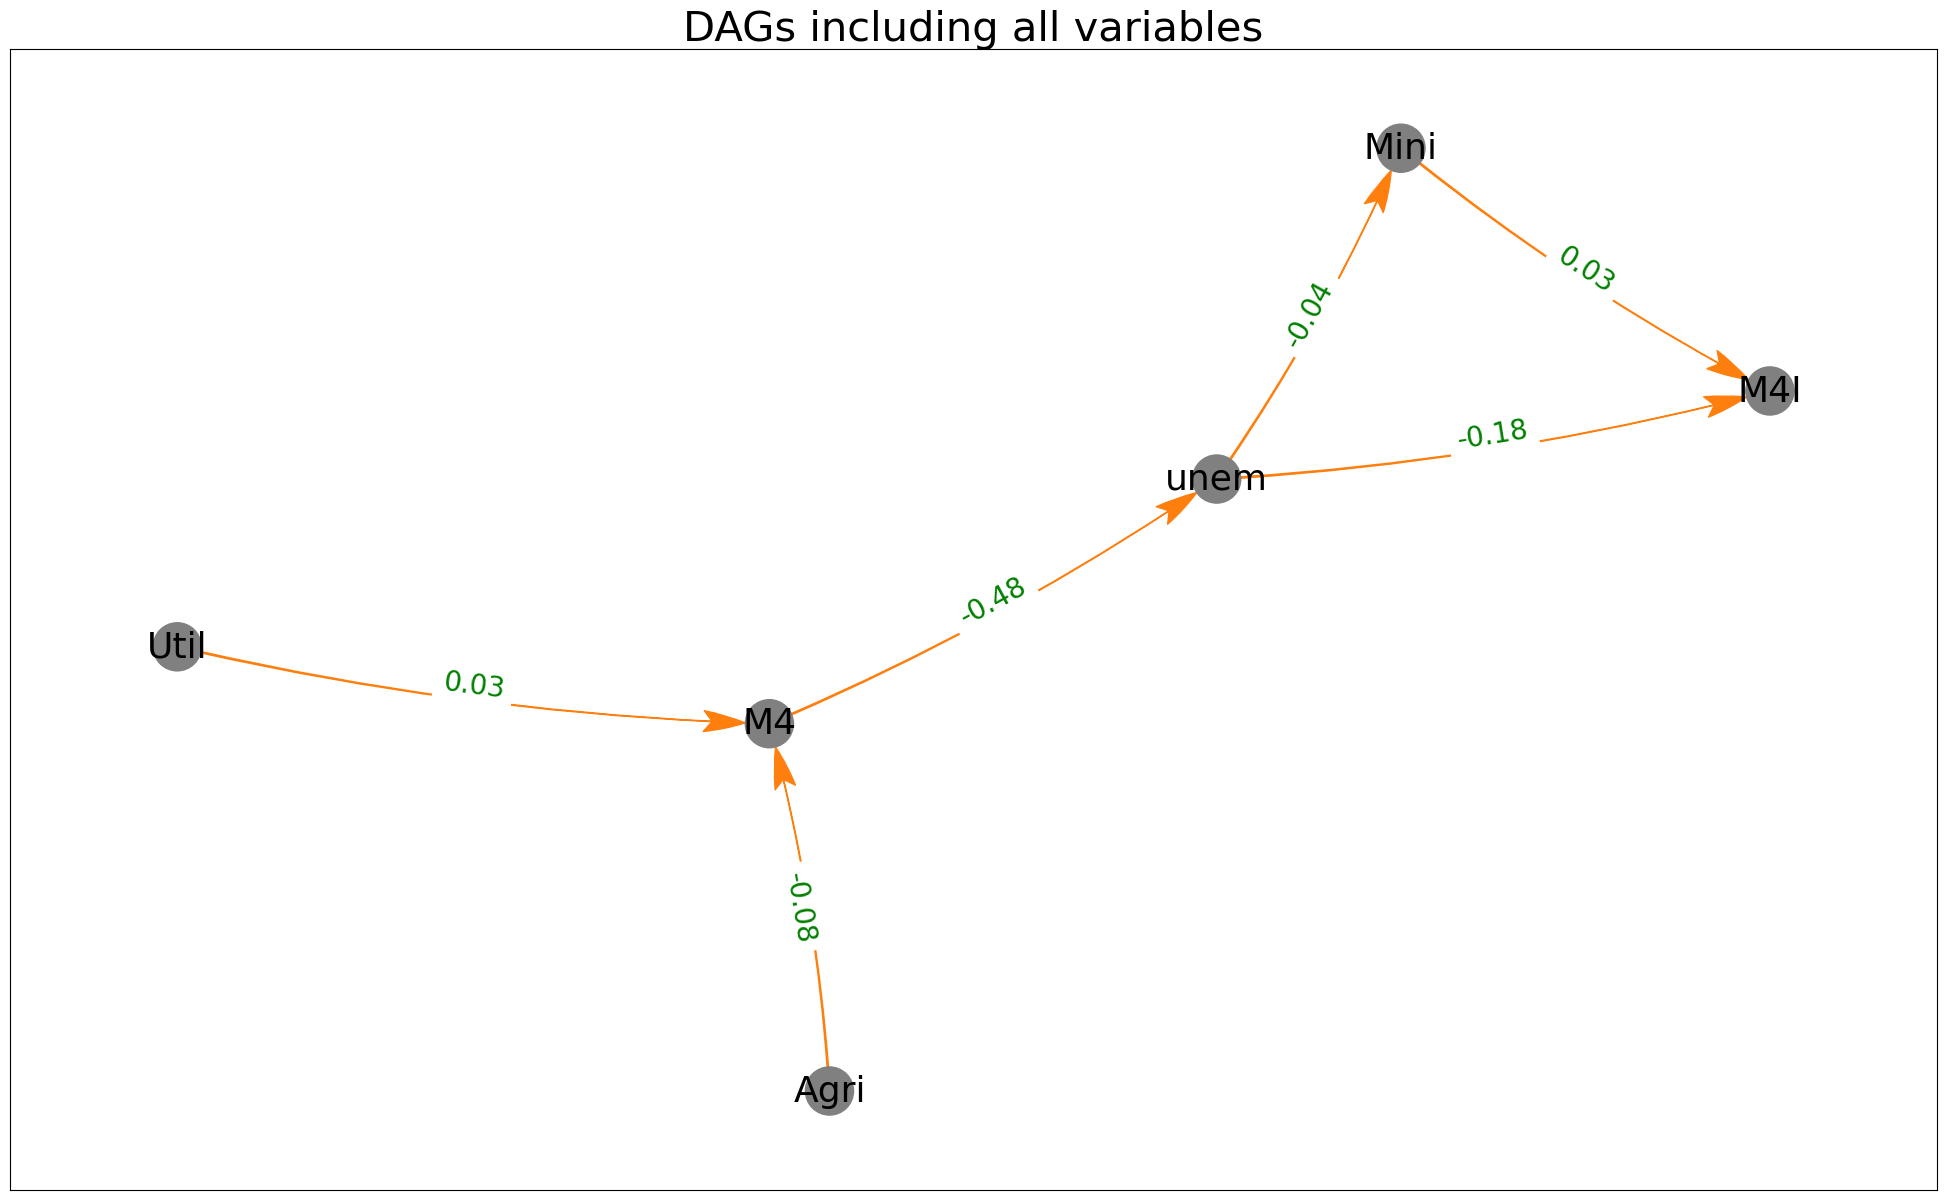

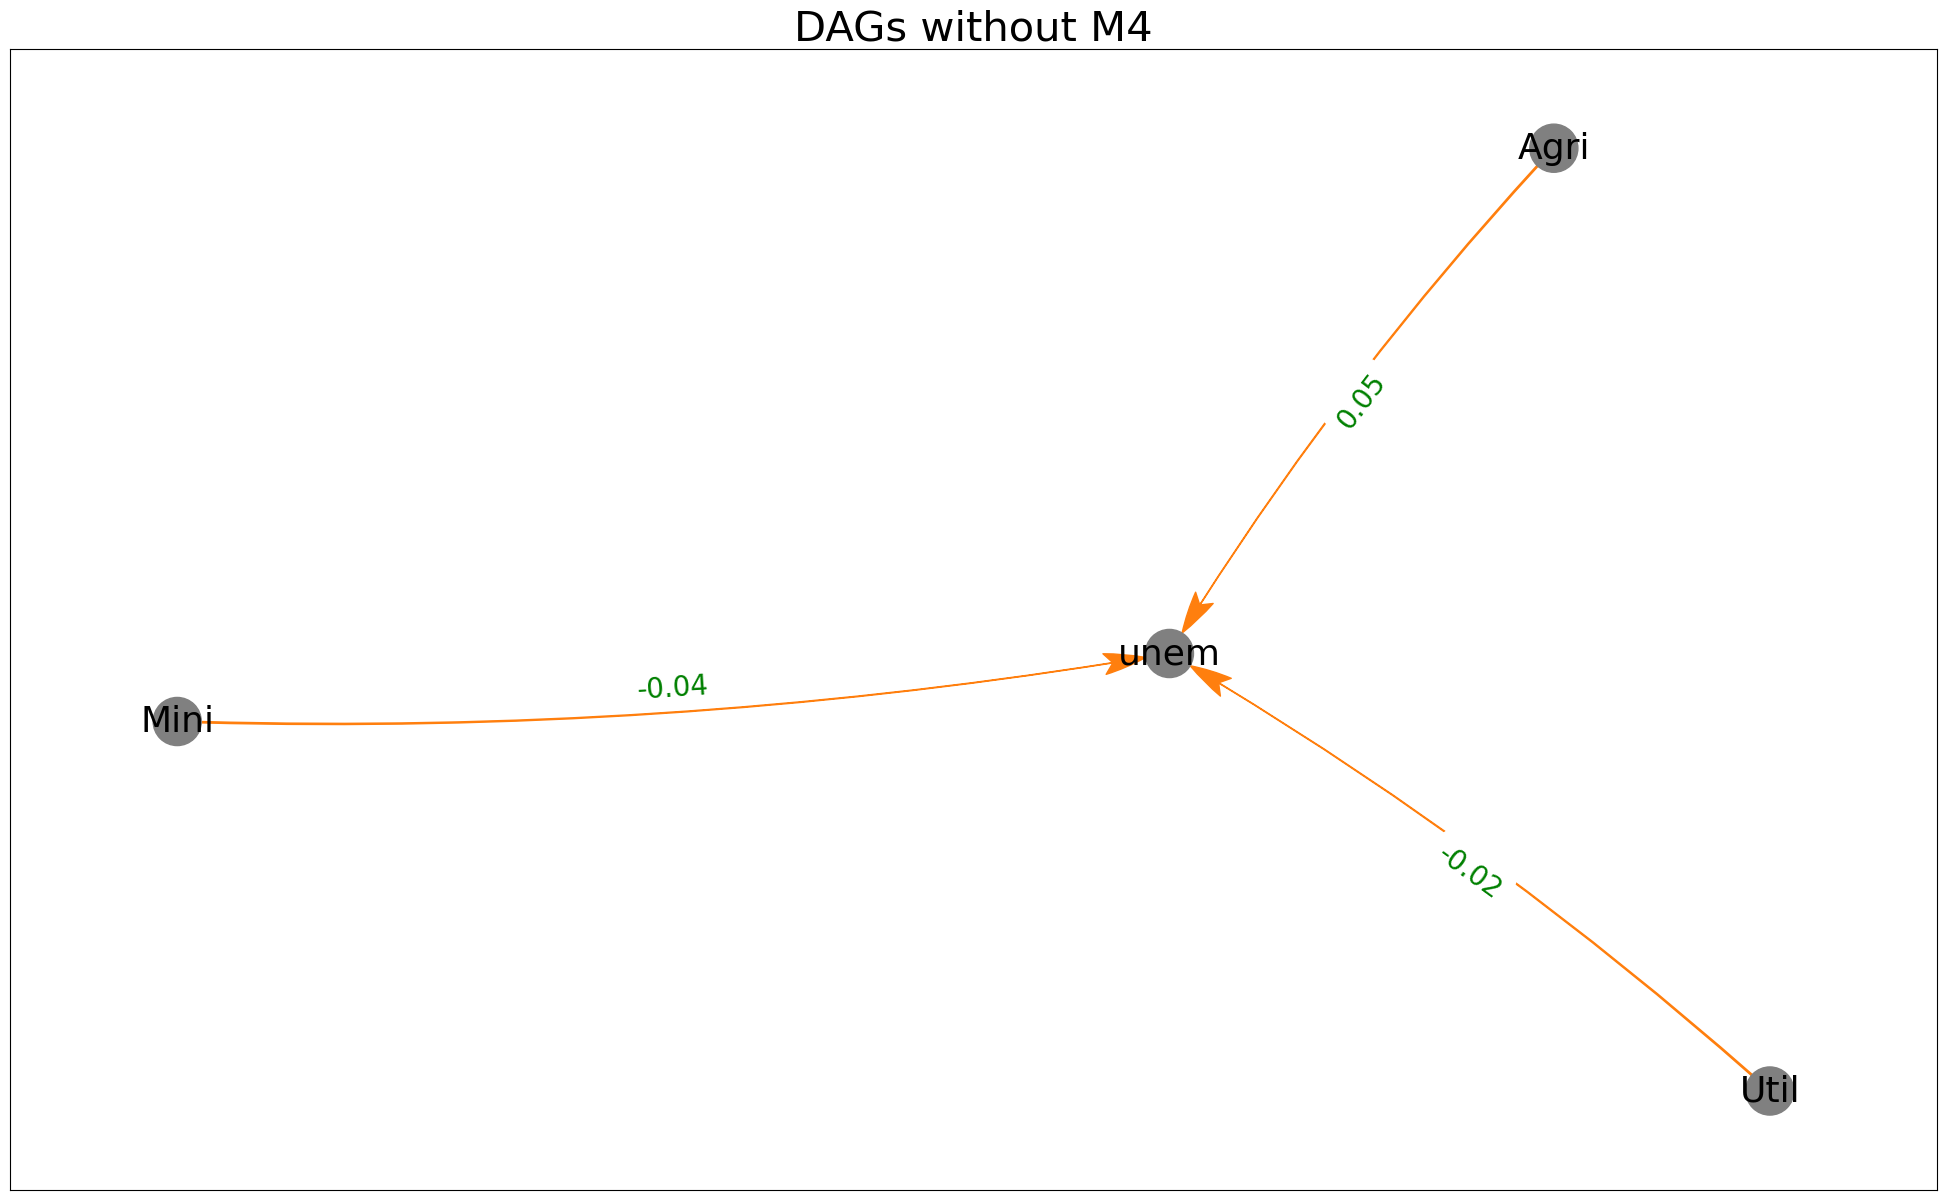

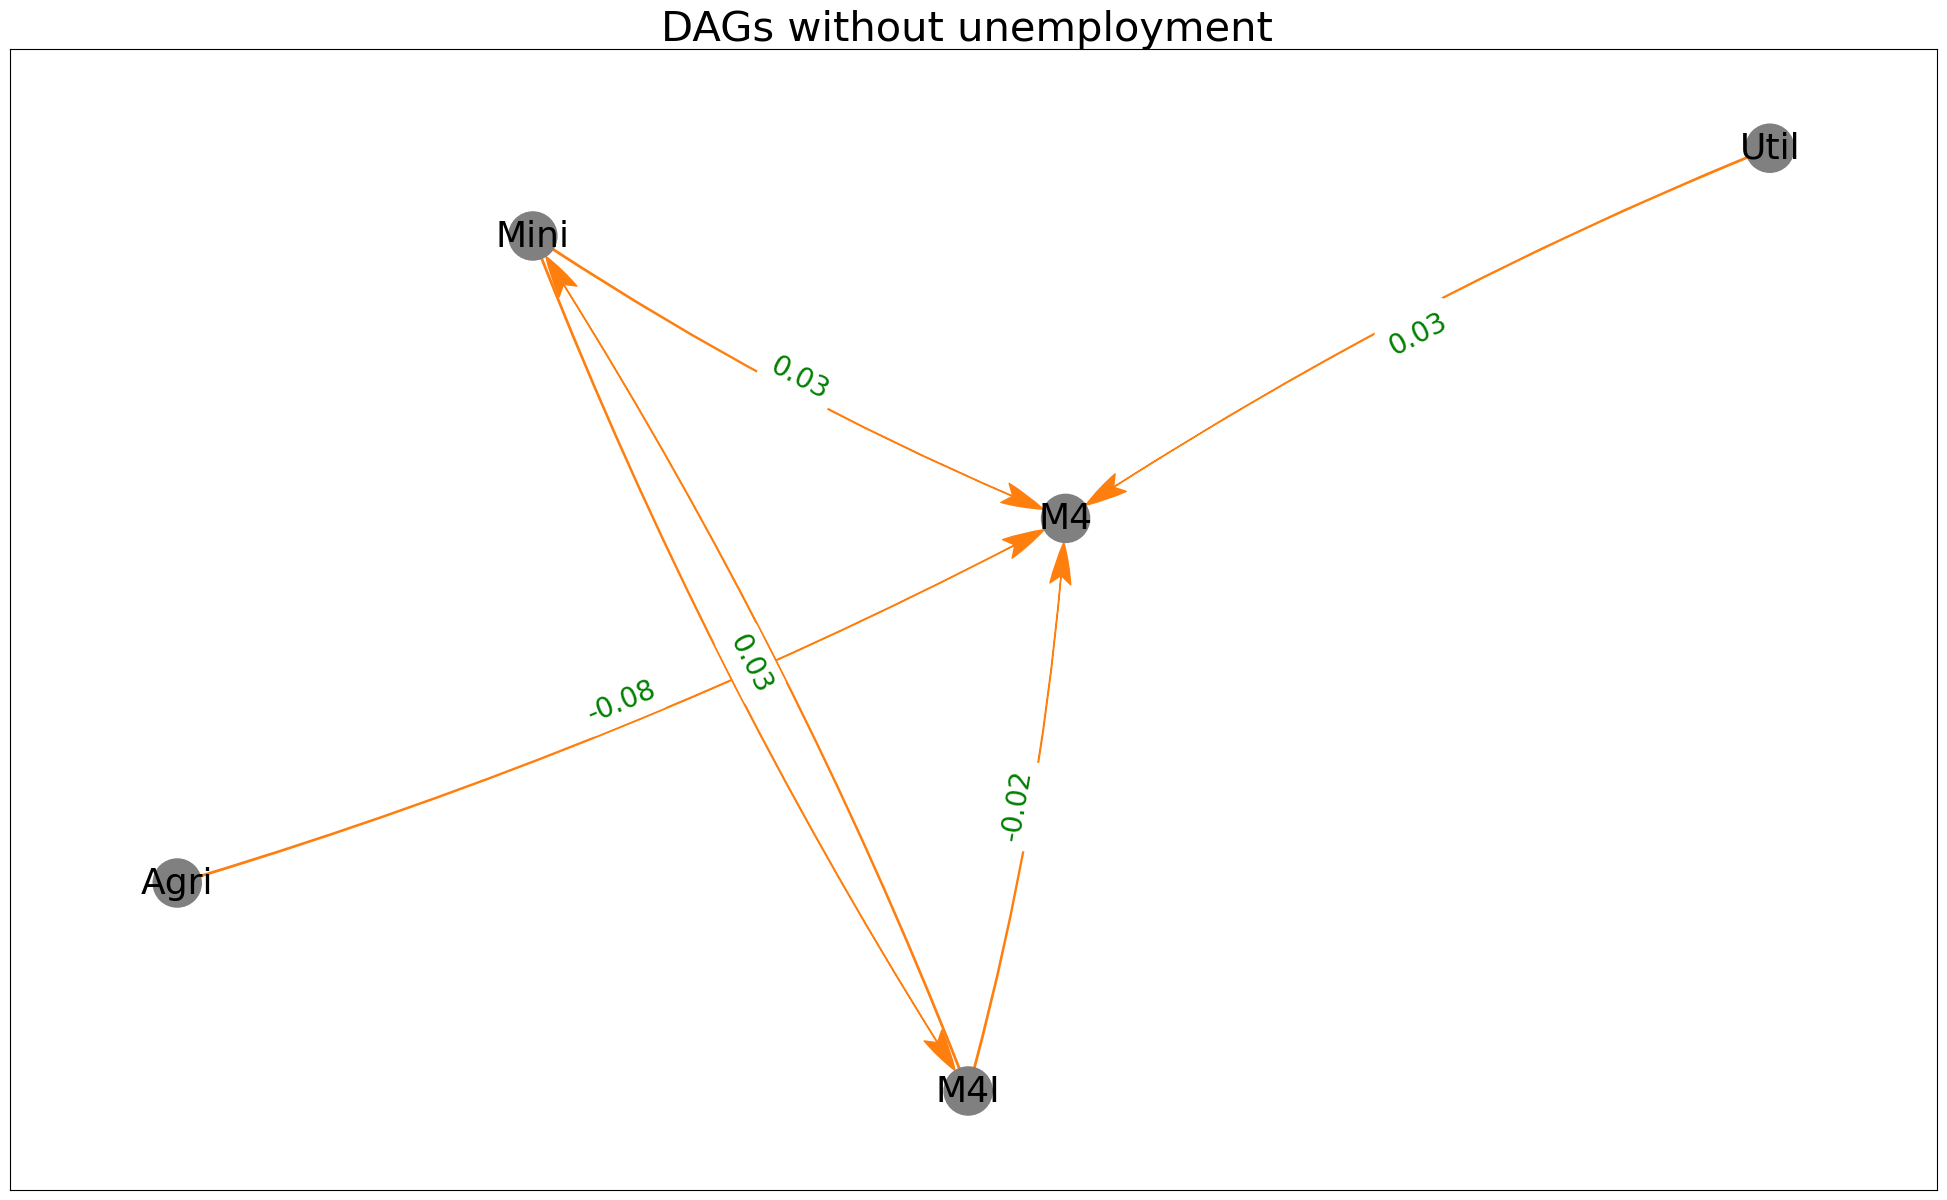

In [27]:
# Initialize a PdfPages object to save the plots in a PDF
pp = PdfPages("DAGs_nominal")

title = ['DAGs including all variables',
        'DAGs without M4',
        'DAGs without unemployment ']

# Plot DAGs for each dataframe
for i, plot_df in enumerate([plot_df4, plot_df5, plot_df6]):
    c = PC(plot_df)
    max_cond_vars = len(plot_df.keys()) - 2
    model = c.estimate(return_type='pdag', variant='orig', significance_level=0.01,
                       max_cond_vars=max_cond_vars, ci_test='pearsonr')
    edges = model.edges

    # Plot the DAG
    graph_DAG(edges, plot_df, title=title[i])
    
    # Save the plot to the PDF
    pp.savefig()

# Close the PdfPages object
pp.close()


The above DAGs results indicate that the presence of the M4 variables act as an intermediary between the effectes of the production components (as can be seen in the first DAG), where M4 acts as an intermediary between the effects of utilities and agriculture. It also indicates the effect of unemployment rates acting as an intermediary as well between components, in this case, it acts as an intermediary between other components and mining.

However, when the M4 variables are excluded from the model, unemployment acts as the sole intermediary between the effects of components (the second DAG). Finally, when unmployment rates are not included in the model, but M4 included, the M4 variables act as the sole intermediary between components and their effects.

This indicates that there is about 100% consistency of the effect of the presence of M4 and Interest rates in the model. i.e, when M4 variables are included in a model, it is expected that they should act as an intermediary between effects of other sectors (or components). The same can also be said about the unemployment rates (but in the absensce of M4).

## Next we cluster the counties and create DAGs

In [28]:
# List of dataframes
dataframes = [ndr_13, ndr_14, ndr_16]

# List of p-values for each dataframe
p_values_list = [0.1, 0.05, 0.01, 0.001]  # Updated to include p-values for each dataframe

# Define names for the output files based on dataframes
output_names = [f'clusters_b{i+1}' for i in range(len(dataframes))]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

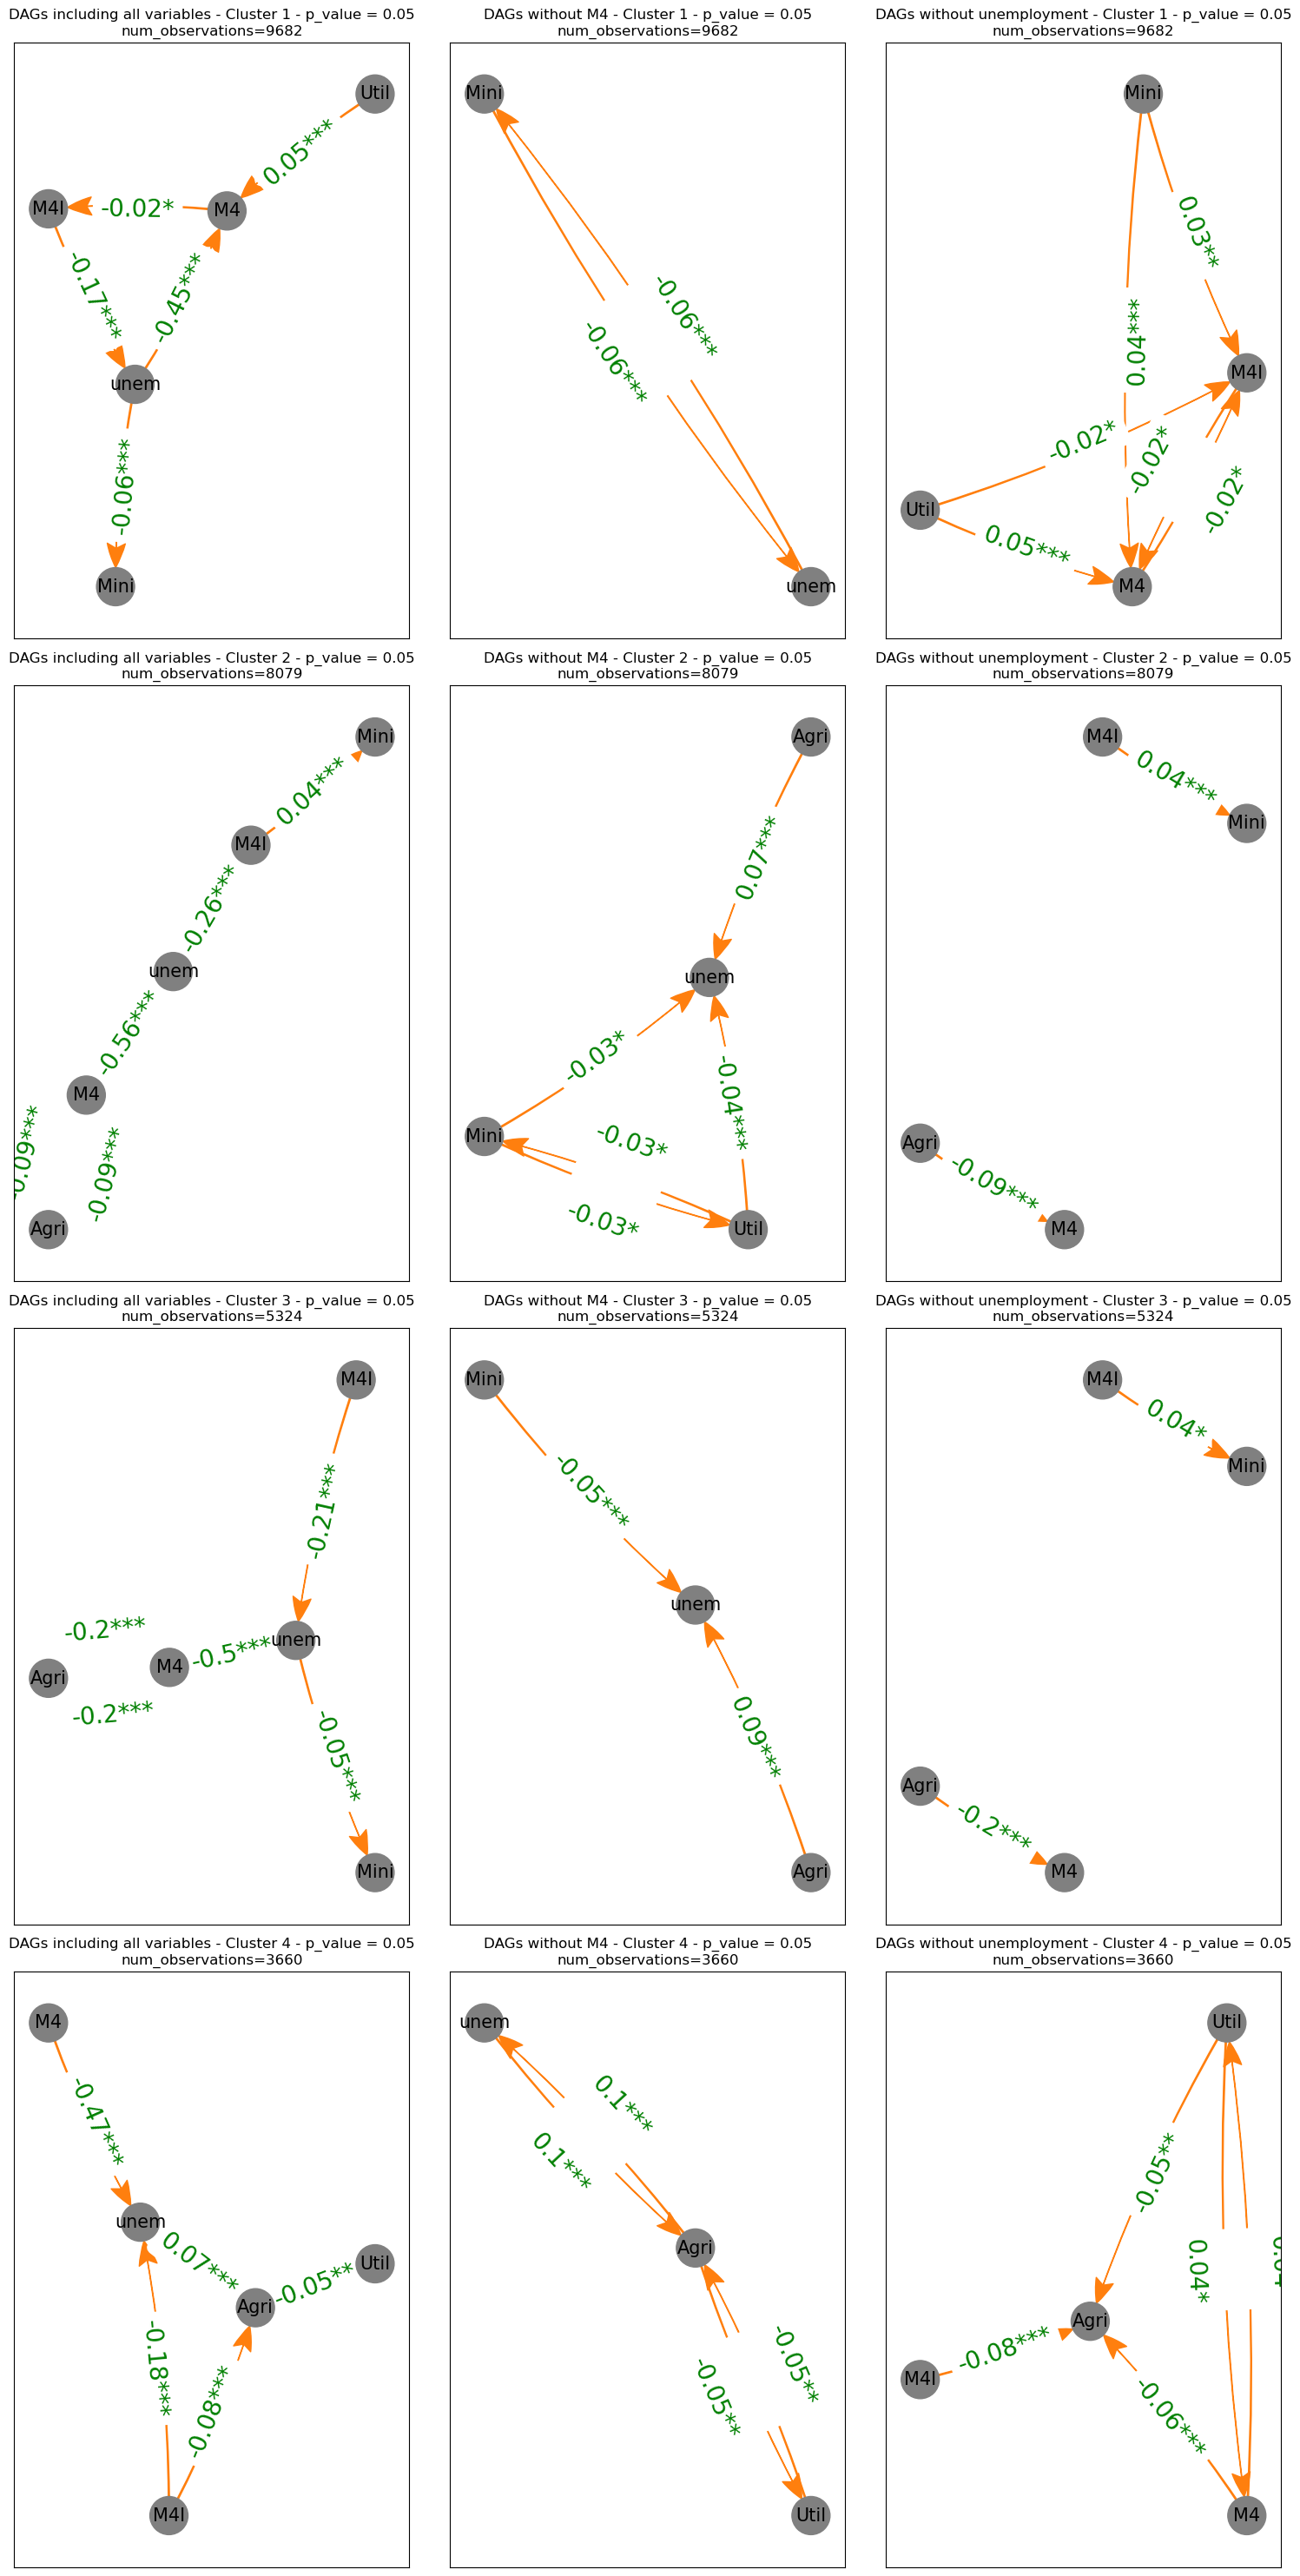

In [113]:
# Specify the absolute path for the output PDF file
pdf_file_path = f"DAGOutputs_{len(dataframes)}_dataframes.pdf"
pp = PdfPages(pdf_file_path)

# Create a grid for the subplots
fig, axes = plt.subplots(4, len(dataframes), figsize=(5*len(dataframes), 30))

# Different PC algorithms to test
algorithms = ["orig"]

dataframe_names = {
    "Dataframe 1": "DAGs including all variables",
    "Dataframe 2": "DAGs without M4",
    "Dataframe 3": "DAGs without unemployment"
}

# Iterate over each dataframe
for idx, dataframe in enumerate(dataframes):
    # Get clustered dataframes for the current dataframe
    clustered_dfs = create_cluster_dags(dataframe)

    # Iterate over clustered dataframes and determine p-values dynamically
    for cluster_idx, cluster_df in enumerate(clustered_dfs):
        n = cluster_df.shape[0]  # Number of observations for the current cluster
        p_value = determine_p_value(n)

        # Iterate over different PC algorithms
        for algorithm in algorithms:
            c = PC(cluster_df)
            model = c.estimate(return_type='pdag', variant=algorithm, significance_level=p_value, ci_test='pearsonr')
            edges = model.edges

            # Create DAG for the current cluster, p-value, and algorithm using the modified graph_DAG function
            graph_DAG_cluster(edges, cluster_df, title=f'{dataframe_names["Dataframe "+str(idx+1)]} - Cluster {cluster_idx + 1} - p_value = {p_value}\nnum_observations={n}'
                      , algorithm=algorithm, ax=axes[cluster_idx, idx], pp=pp)

# Save the figure to the PDF
pp.savefig(fig, bbox_inches='tight')

pp.close()
plt.show()

The above DAGs represent the results of clustering the counties and then generating DAGs from the clusters. The first column represent the DAGs created using all variables, the second column represent DAGs without M4 variables and the third column represent DAGs without unemployment rates.

We expect that the results should be consistent with the initial DAGs created (i.e, DAGs without clusters). The first column has a very similar set of results to the initial results. Where M4 intermediates the effects of other components. There is not a 100% consistency however.

For the second column (where the M4 variables are not included in the model), there is about 50% consistency of unemployment rates acting as an intermediary between the effects of other variables.

Finaly, the third column which represents DAGs for the model that does not include unemployment rates indicates about 25% consistency amongst the clusters.

The most consistent results according to the DAGs from the clusters compared with the original results appear to be the model where all variables are included.

In [30]:
edges_dct = get_edges_dict(dataframes)
col_shared_edges=get_col_shared_edges(edges_dct)
row_shared_edges=get_row_shared_edges(edges_dct)

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [31]:
# def plot_shared_edges(shared_edges):
#     for key, lst in shared_edges.items():
#         fig, ax = plt.subplots(figsize=(6, 6))
#         G = nx.from_edgelist(lst)
#         color_map = ["grey" for _ in G]
#         plt.tight_layout()
#         pos = graphviz_layout(G)
#         nx.draw_networkx(G, pos, node_color=color_map, node_size=2500,
#                          font_color="black",
#                          font_size=26, alpha=1,
#                          width=1, edge_color="C1",
#                          connectionstyle='arc3, rad = 0.05',
#                          ax=ax)
#     plt.show()

/Users/abiodun.idowu/anaconda3/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:304: UserWarning: 

The connectionstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default value for connectionstyle.
Note that using FancyArrowPatches may be slow for large graphs.

  draw_networkx_edges(G, pos, arrows=arrows, **edge_kwds)


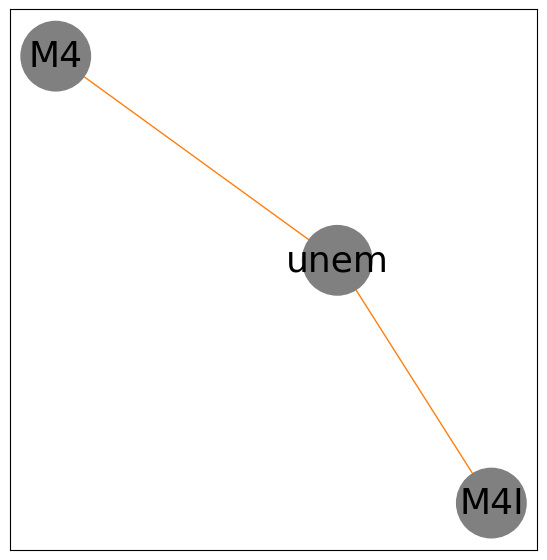

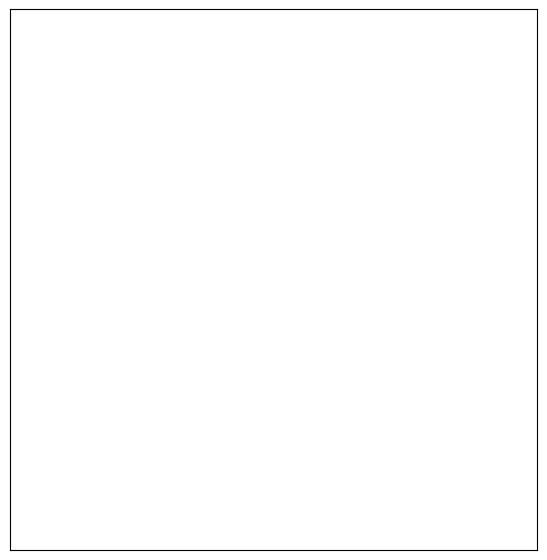

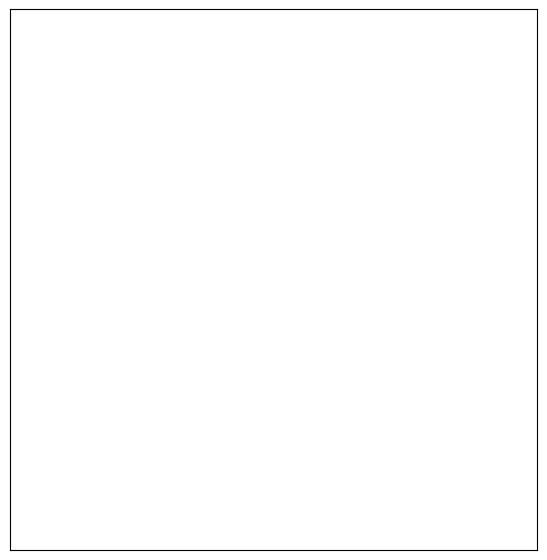

In [32]:
plot_shared_edges(col_shared_edges)

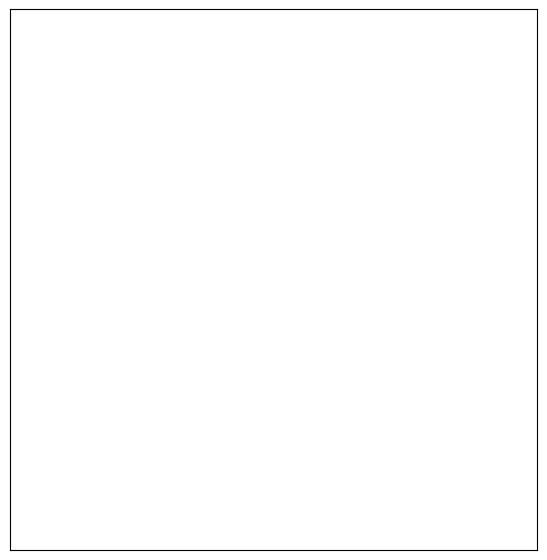

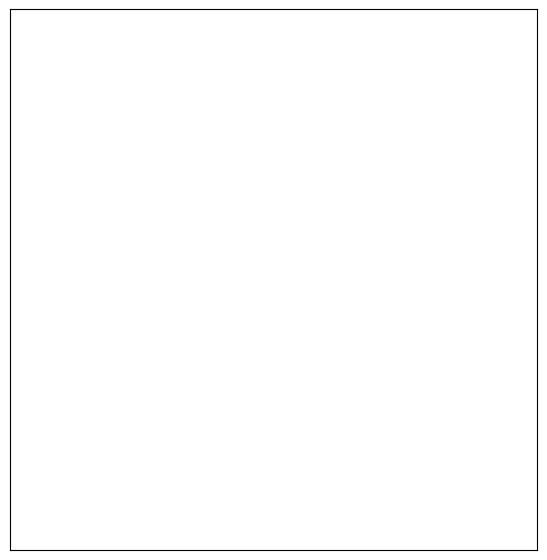

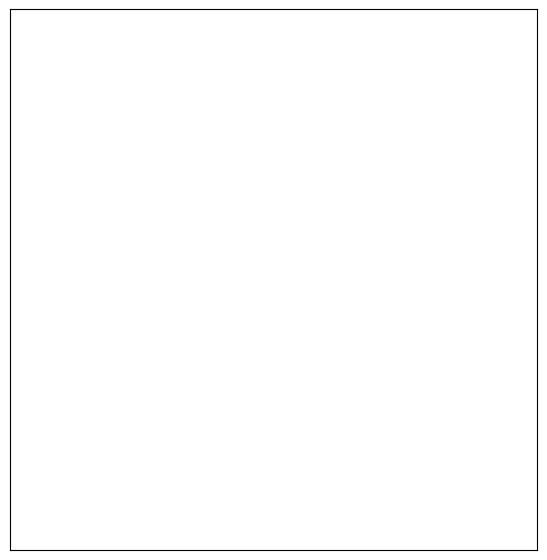

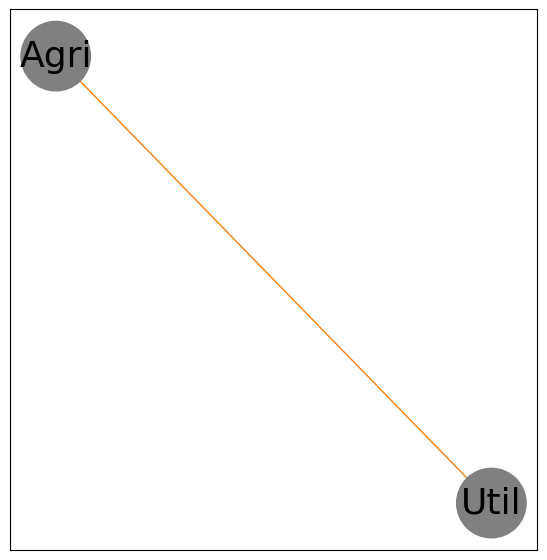

In [33]:
plot_shared_edges(row_shared_edges)

In [34]:
cluster_nominal_diff = ndr_13.reset_index()

In [35]:
full_nominal_diff = plot_df4.reset_index()

In [36]:
full_cluster_nominal_diff = pd.merge(full_nominal_diff, cluster_nominal_diff, on='FIPS_y', how='outer')

In [37]:
full_cluster_nominal_diff = full_cluster_nominal_diff.drop(columns=['Agri_x', 'Mini_x', 'Util_x', 'M4_x', 'M4I_x',
       'unem_x'])

In [38]:
full_cluster_nominal_diff=full_cluster_nominal_diff.rename(columns={'Agri_y':'Agri', 
                                          'Mini_y':'Mini', 
                                          'Util_y':'Util', 
                                          'M4_y':'M4', 
                                          'M4I_y':'M4I',
                                          'unem_y':'unem'})

In [39]:
full_cluster_nominal_diff=full_cluster_nominal_diff.set_index(['FIPS_y', 'TimePeriod'])

In [40]:
df_prelim = full_cluster_nominal_diff.copy()

In [41]:
df_prelim[['Agri', 'Mini', 'Util', 'M4', 'M4I', 'unem']].describe()

,Agri,Mini,Util,M4,M4I,unem
count,380523.000000,380523.000000,380523.000000,380523.000000,380523.000000,380523.000000
mean,0.008115,-0.009857,-0.004517,0.002424,-0.000390,0.051999
std,1.198876,0.620573,0.515628,0.051701,0.006651,1.413580
min,-7.485003,-7.196588,-10.957942,-0.110658,-0.017333,-8.569231
25%,-0.531103,-0.230859,-0.143026,-0.006913,-0.001517,-0.700000
50%,-0.036171,-0.004177,-0.000289,0.007226,-0.000079,-0.253846
75%,0.479078,0.214184,0.127396,0.014530,0.001597,0.315385
max,8.803364,10.443862,9.861832,0.155660,0.011944,11.384615


In [42]:
df = df_prelim

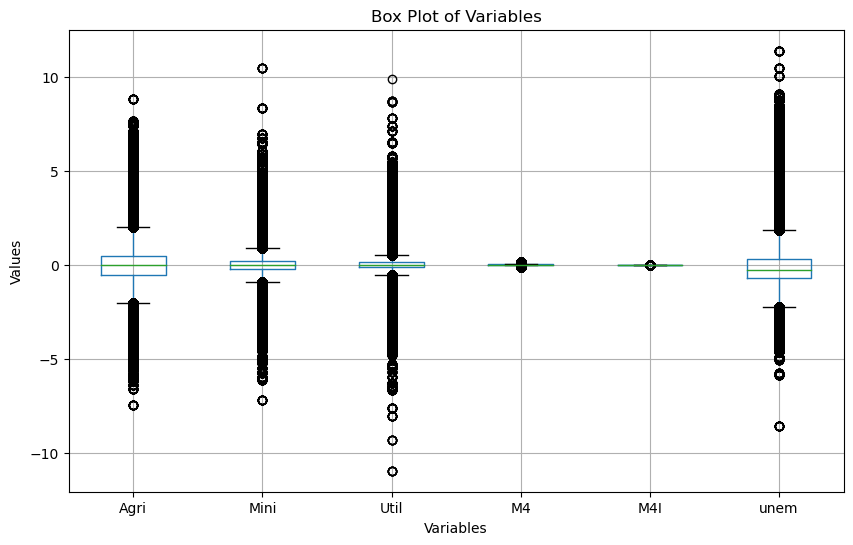

In [43]:
# Box plot of variables across different FIPS_y
plt.figure(figsize=(10, 6))
df[['Agri', 'Mini', 'Util', 'M4', 'M4I', 'unem']].boxplot()
plt.xlabel('Variables')
plt.ylabel('Values')
plt.title('Box Plot of Variables')
plt.show()

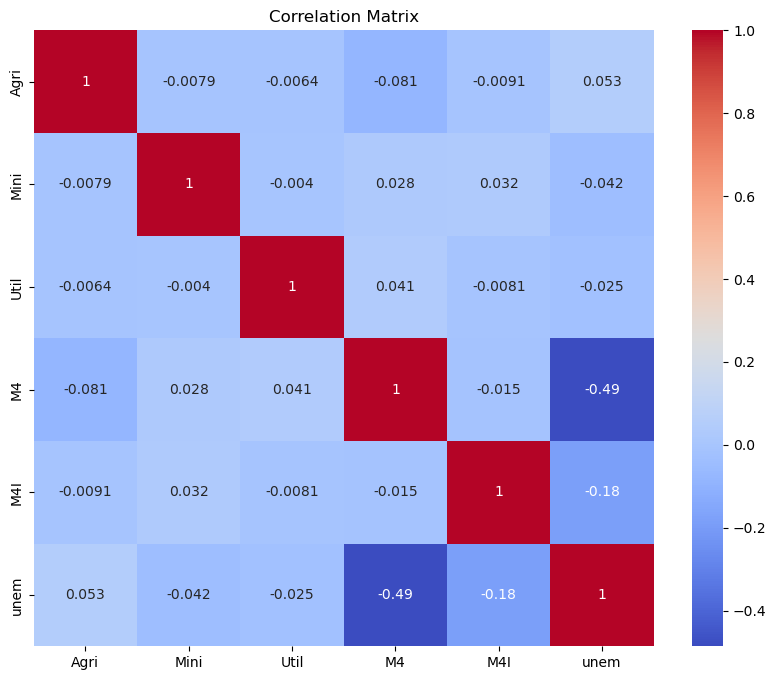

In [44]:
# Correlation matrix
correlation_matrix = df[['Agri', 'Mini', 'Util', 'M4', 'M4I', 'unem']].corr()
#print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [45]:
# Group by 'clusters' and calculate the mean of each variable
mean_values_by_clusters = df.groupby('clusters').mean().reset_index()

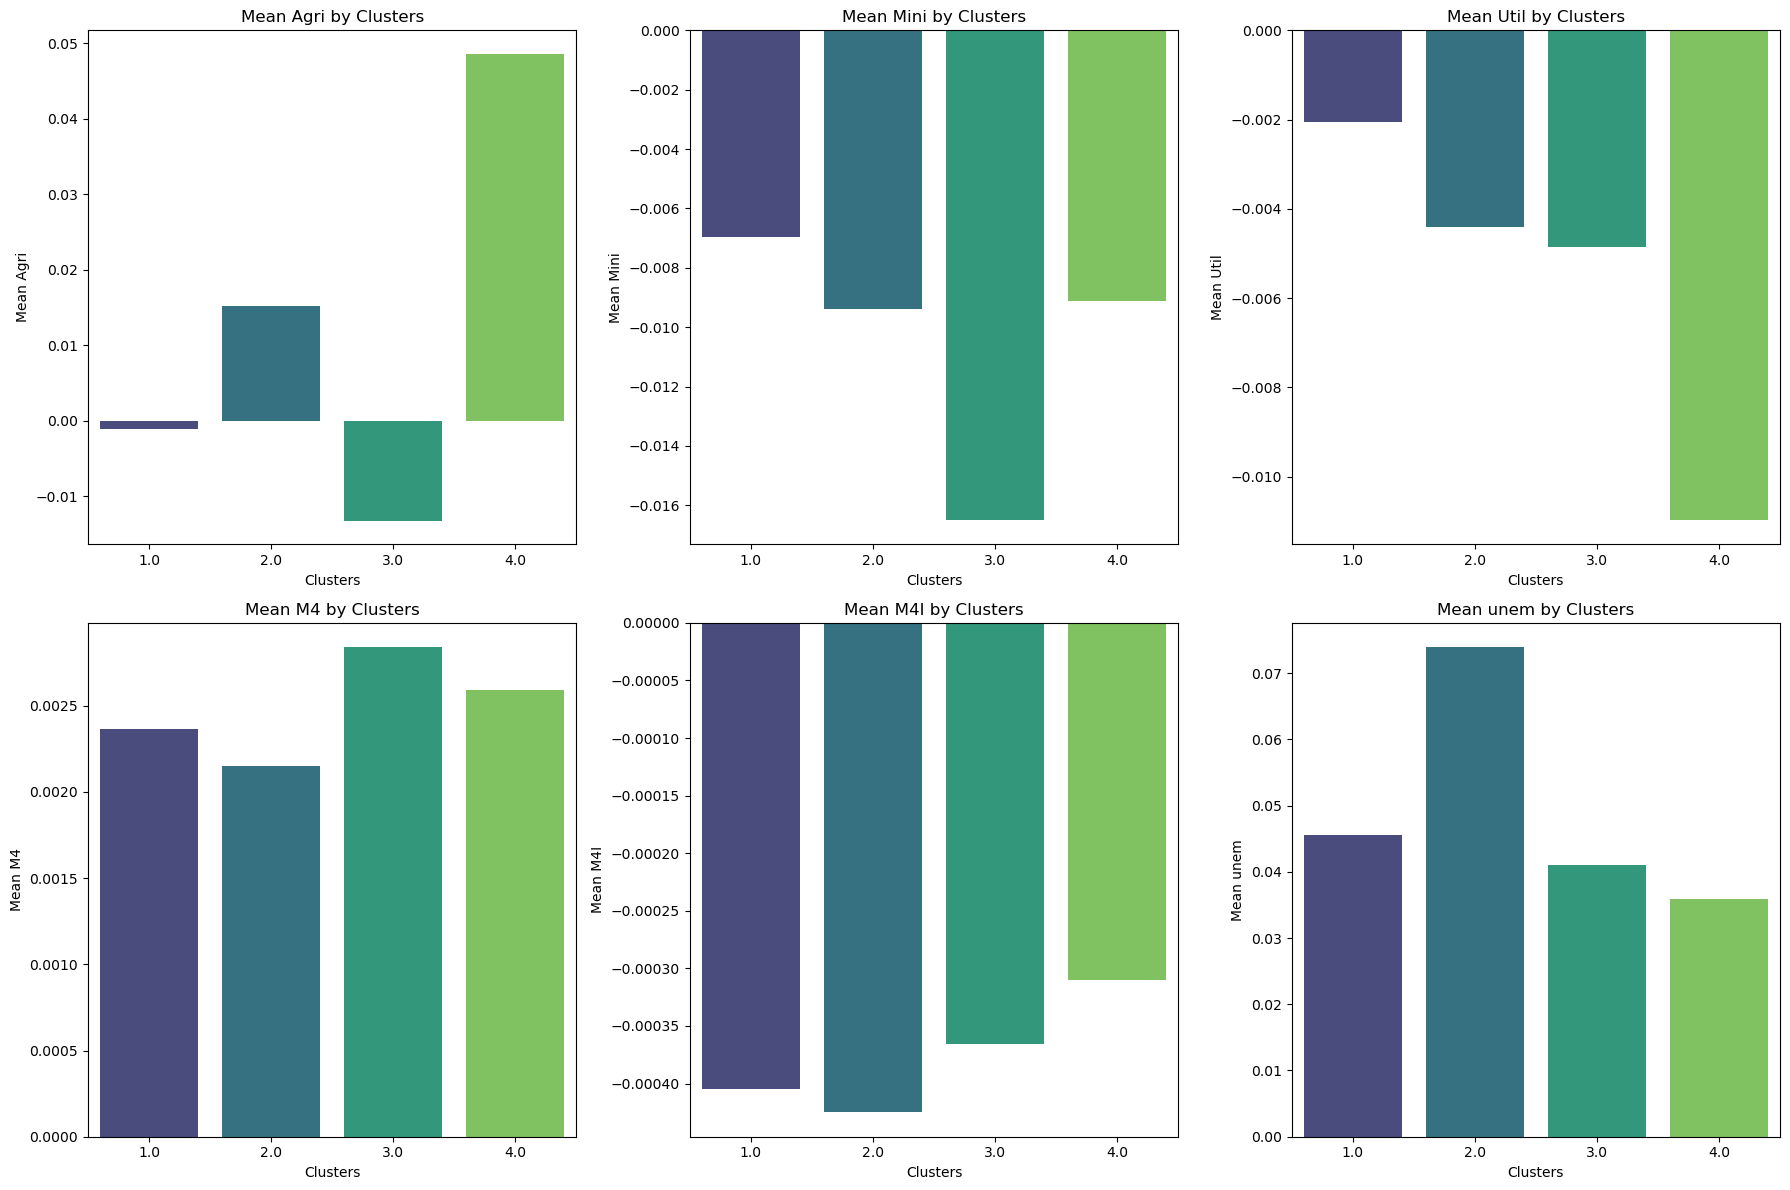

In [46]:
# List of variables to plot
variables = ['Agri', 'Mini', 'Util', 'M4', 'M4I', 'unem']

# Set up the plot grid
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
axes = axes.flatten()

# Plot each variable
for i, var in enumerate(variables):
    sns.barplot(x='clusters', y=var, data=mean_values_by_clusters, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Mean {var} by Clusters')
    axes[i].set_xlabel('Clusters')
    axes[i].set_ylabel(f'Mean {var}')

# Adjust layout
plt.tight_layout()
plt.show()

In [47]:
mean_values_by_clusters

,clusters,Agri,Mini,Util,M4,M4I,unem
0,1.0,-0.001156,-0.006950,-0.002045,0.002365,-0.000405,0.045563
1,2.0,0.015193,-0.009370,-0.004418,0.002153,-0.000425,0.073898
2,3.0,-0.013267,-0.016486,-0.004850,0.002839,-0.000366,0.040982
3,4.0,0.048645,-0.009127,-0.010969,0.002592,-0.000310,0.035963


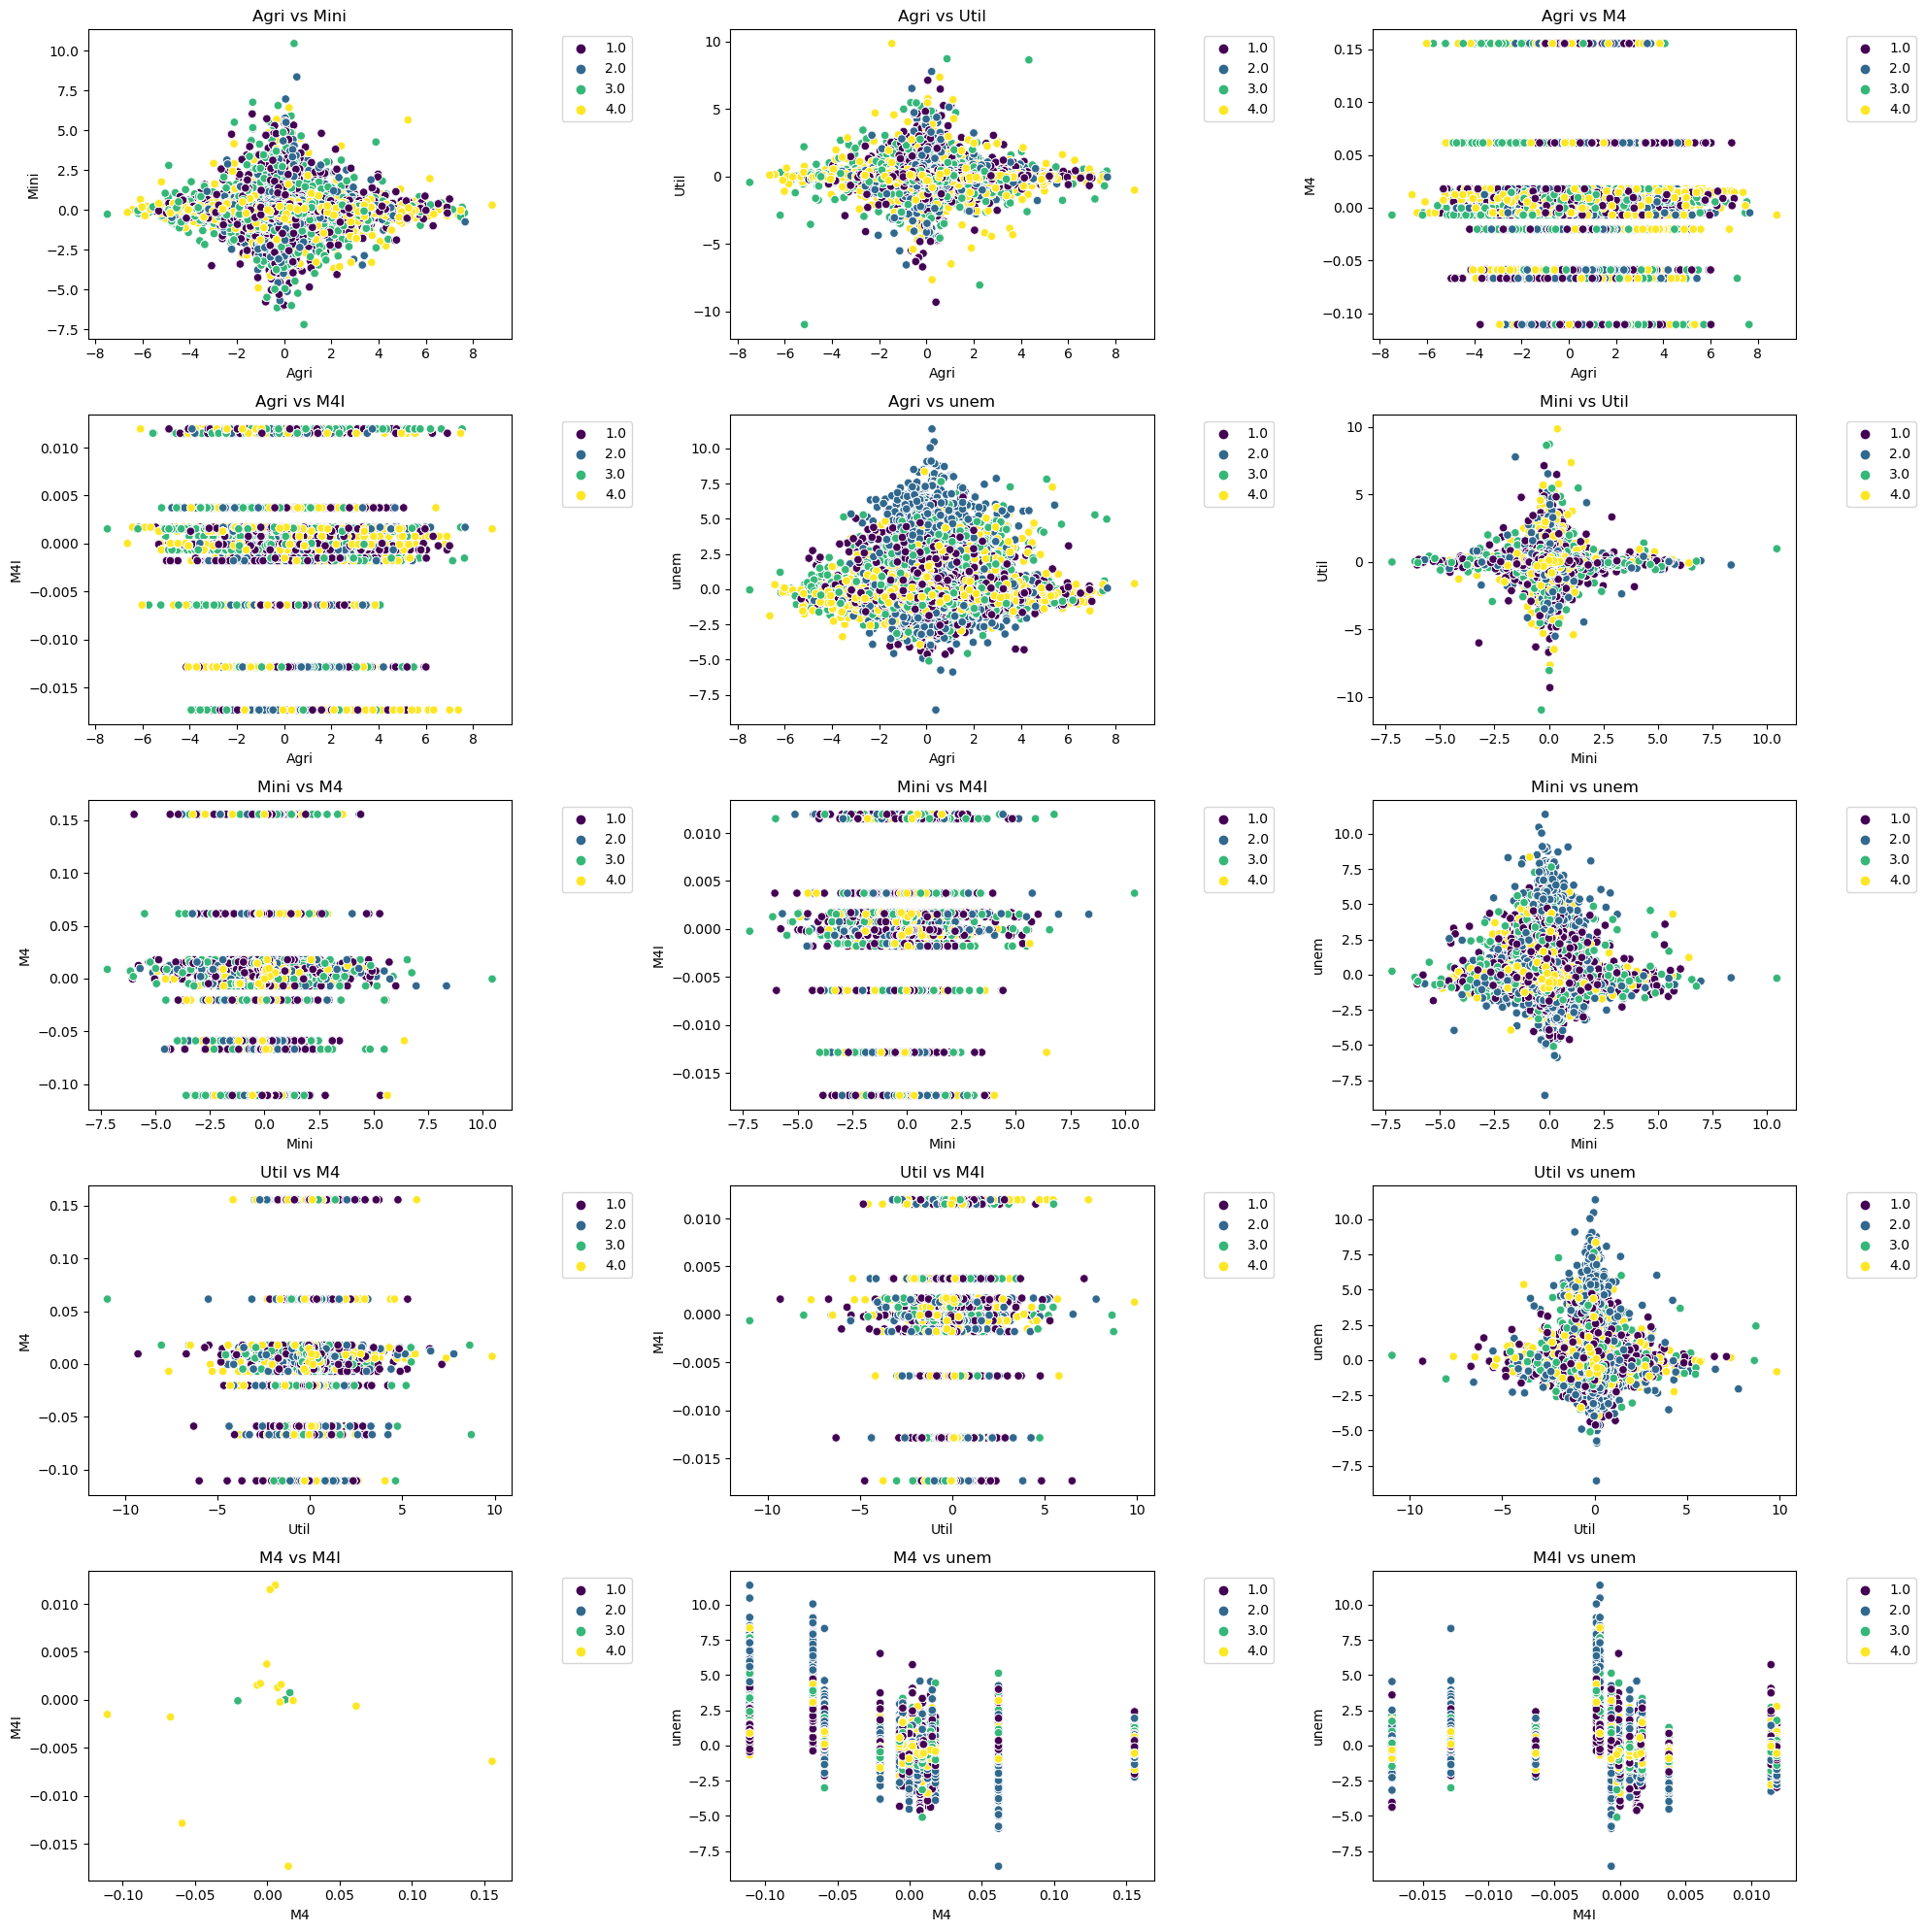

In [48]:
# Set up the plot grid
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 20))
axes = axes.flatten()


# Generate scatter plots
plot_num = 0
for i in range(len(variables)):
    for j in range(i + 1, len(variables)):
        if plot_num >= len(axes):
            break
        sns.scatterplot(x=variables[i], y=variables[j], hue='clusters', data=df.reset_index(), 
                        ax=axes[plot_num], palette='viridis', legend='full')
        axes[plot_num].set_title(f'{variables[i]} vs {variables[j]}')
        axes[plot_num].legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
        plot_num += 1

# Adjust layout
plt.tight_layout()
plt.show()

#### Mixed effects regression

In [49]:
df = full_cluster_nominal_diff.reset_index()
df = df.dropna()

# Fit a linear mixed effects model
m_me1 = smf.mixedlm("unem ~ Mini + Util + M4 + M4I + Agri", df, groups=df['clusters'])
r_me1 = m_me1.fit()

/Users/abiodun.idowu/anaconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [50]:
r_me1.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
          Mixed Linear Model Regression Results
==========================================================
Model:            MixedLM Dependent Variable: unem        
No. Observations: 380523  Method:             REML        
No. Groups:       4       Scale:              1.4519      
Min. group size:  51036   Log-Likelihood:     -610914.4174
Max. group size:  138718  Converged:          Yes         
Mean group size:  95130.8                                 
----------------------------------------------------------
            Coef.  Std.Err.    z     P>|z|  [0.025  0.975]
----------------------------------------------------------
Intercept    0.066    0.602    0.110 0.913  -1.115   1.247
Mini        -0.049    0.003  -15.672 0.000  -0.056  -0.043
Util        -0.017    0.004   -4.463 0.000  -0.024  -0.009
M4         -13.311    0.038 -350.672 0.000 -13.386 -13.237
M4I        -40.505    0.294 -137.816 0.000 -41.081 -39.929
Agri         0.014    0.002    8.316 0.000   0.010   0.017
Group Var    1.452                                        
==========================================================

"""

In [51]:
m_me2 = smf.mixedlm("unem ~ Mini + Util + M4 + M4I + Agri", df, groups=df['FIPS_y'])
r_me2 = m_me2.fit()

In [52]:
r_me2.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
          Mixed Linear Model Regression Results
==========================================================
Model:            MixedLM Dependent Variable: unem        
No. Observations: 380523  Method:             REML        
No. Groups:       2299    Scale:              1.4292      
Min. group size:  1       Log-Likelihood:     -609478.5670
Max. group size:  324     Converged:          Yes         
Mean group size:  165.5                                   
----------------------------------------------------------
            Coef.  Std.Err.    z     P>|z|  [0.025  0.975]
----------------------------------------------------------
Intercept    0.069    0.005   14.667 0.000   0.060   0.078
Mini        -0.049    0.003  -15.611 0.000  -0.055  -0.043
Util        -0.018    0.004   -4.789 0.000  -0.026  -0.011
M4         -13.295    0.038 -352.188 0.000 -13.369 -13.221
M4I        -40.180    0.293 -136.906 0.000 -40.755 -39.605
Agri         0.014    0.002    8.326 0.000   0.010   0.017
Group Var    0.034    0.001                               
==========================================================

"""

#### Fixed effects

In [53]:
df = df.set_index(['FIPS_y', 'TimePeriod'])

# Define the model formula
formula = 'unem ~ Mini + Util + M4 + M4I + Agri + EntityEffects'

# Fit the fixed effects model
m_fe = PanelOLS.from_formula(formula, df)
r_fe = m_fe.fit()

In [54]:
r_fe.summary

Dep. Variable:,unem,R-squared:,0.2743
Estimator:,PanelOLS,R-squared (Between):,0.2324
No. Observations:,380523,R-squared (Within):,0.2743
Date:,"Thu, May 23 2024",R-squared (Overall):,0.2720
Time:,18:44:48,Log-likelihood,-6.065e+05
Cov. Estimator:,Unadjusted,,
,,F-statistic:,2.859e+04
Entities:,2299,P-value,0.0000
Avg Obs:,165.52,Distribution:,"F(5,378219)"
Min Obs:,1.0000,,
Max Obs:,324.00,F-statistic (robust):,2.859e+04


In [55]:
df = df.reset_index()

In [56]:
df = df.reset_index().set_index(['FIPS_y', 'index'])


# Define the model formula
formula1 = 'unem ~ Mini + Util + M4 + M4I + Agri + clusters + C(TimePeriod)'

In [57]:

# Fit the fixed effects model
m_fe_time = PanelOLS.from_formula(formula1, df)
r_fe_time = m_fe_time.fit()

In [58]:
r_fe_time.summary

Dep. Variable:,unem,R-squared:,0.2736
Estimator:,PanelOLS,R-squared (Between):,0.2742
No. Observations:,380523,R-squared (Within):,0.2741
Date:,"Thu, May 23 2024",R-squared (Overall):,0.2736
Time:,18:44:49,Log-likelihood,-6.108e+05
Cov. Estimator:,Unadjusted,,
,,F-statistic:,6230.2
Entities:,2299,P-value,0.0000
Avg Obs:,165.52,Distribution:,"F(23,380499)"
Min Obs:,1.0000,,
Max Obs:,324.00,F-statistic (robust):,5472.2


In [59]:
# Define the model formula
formula2 = 'unem ~ Mini + Util + M4 + M4I + Agri + EntityEffects + C(TimePeriod)'

In [60]:
# Fit the fixed effects model
m_fe_time2 = PanelOLS.from_formula(formula2, df)
r_fe_time2 = m_fe_time2.fit()

In [61]:
r_fe_time2.summary

Dep. Variable:,unem,R-squared:,0.2743
Estimator:,PanelOLS,R-squared (Between):,0.2536
No. Observations:,380523,R-squared (Within):,0.2743
Date:,"Thu, May 23 2024",R-squared (Overall):,0.2734
Time:,18:44:50,Log-likelihood,-6.065e+05
Cov. Estimator:,Unadjusted,,
,,F-statistic:,6498.5
Entities:,2299,P-value,0.0000
Avg Obs:,165.52,Distribution:,"F(22,378202)"
Min Obs:,1.0000,,
Max Obs:,324.00,F-statistic (robust):,5748.3


In [62]:
# Define the model formula
formula3 = 'unem ~ Mini + Util + M4 + M4I + Agri + EntityEffects + C(TimePeriod) + clusters'

In [63]:
# Fit the fixed effects model
m_fe_time3 = plm.PanelOLS.from_formula(formula3, df, drop_absorbed=True)
r_fe_time3 = m_fe_time3.fit()

/var/folders/wr/k9fjy7x96svcj5th08wsq71c0000gn/T/ipykernel_70567/156897563.py:3: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

clusters

  r_fe_time3 = m_fe_time3.fit()


In [64]:
r_fe_time3.summary

Dep. Variable:,unem,R-squared:,0.2743
Estimator:,PanelOLS,R-squared (Between):,0.2536
No. Observations:,380523,R-squared (Within):,0.2743
Date:,"Thu, May 23 2024",R-squared (Overall):,0.2734
Time:,18:44:52,Log-likelihood,-6.065e+05
Cov. Estimator:,Unadjusted,,
,,F-statistic:,6498.5
Entities:,2299,P-value,0.0000
Avg Obs:,165.52,Distribution:,"F(22,378202)"
Min Obs:,1.0000,,
Max Obs:,324.00,F-statistic (robust):,5748.3


In [65]:
# Define the model formula
formula4 = 'unem ~ Mini + Util + M4 + M4I + Agri + clusters'

# Fit the fixed effects model
m_fe_time4 = plm.PanelOLS.from_formula(formula4, df, drop_absorbed=False)
r_fe_time4 = m_fe_time4.fit()

In [66]:
r_fe_time4.summary

Dep. Variable:,unem,R-squared:,0.2739
Estimator:,PanelOLS,R-squared (Between):,0.2580
No. Observations:,380523,R-squared (Within):,0.2743
Date:,"Thu, May 23 2024",R-squared (Overall):,0.2739
Time:,18:44:52,Log-likelihood,-6.11e+05
Cov. Estimator:,Unadjusted,,
,,F-statistic:,2.392e+04
Entities:,2299,P-value,0.0000
Avg Obs:,165.52,Distribution:,"F(6,380517)"
Min Obs:,1.0000,,
Max Obs:,324.00,F-statistic (robust):,2.392e+04


In [67]:
# Convert 'clusters' column to dummy variables, dropping the first category
df = pd.get_dummies(df, columns=['clusters'], drop_first=True)

# List all the dummy variables created
cluster_dummies = [col for col in df.columns if col.startswith('clusters_')]

In [68]:
# Define the model formula including the cluster dummy variables
formula = f'unem ~ Mini + Util + M4 + M4I + Agri + {" + ".join(cluster_dummies)}'

# Fit the fixed effects model
m_fe_time = PanelOLS.from_formula(formula, df)
r_fe_time = m_fe_time.fit()

In [69]:
# Display the results
r_fe_time.summary

Dep. Variable:,unem,R-squared:,0.2737
Estimator:,PanelOLS,R-squared (Between):,0.2558
No. Observations:,380523,R-squared (Within):,0.2743
Date:,"Thu, May 23 2024",R-squared (Overall):,0.2737
Time:,18:44:53,Log-likelihood,-6.11e+05
Cov. Estimator:,Unadjusted,,
,,F-statistic:,1.793e+04
Entities:,2299,P-value,0.0000
Avg Obs:,165.52,Distribution:,"F(8,380515)"
Min Obs:,1.0000,,
Max Obs:,324.00,F-statistic (robust):,1.793e+04


In [70]:
# df = full_cluster_nominal_diff.reset_index()
# df = df.dropna()

#### Comparison of the fixed effect models

In [71]:
from linearmodels.panel import compare

compare({"FE+clusters(time effect)": r_fe_time, "FE (entity and time effects)": r_fe_time2, 
         "FE+clusters (entity and time effects)": r_fe_time3, 
         "FE+clusters (no effects)": r_fe_time4})

,FE+clusters(time effect),FE (entity and time effects),FE+clusters (entity and time effects),FE+clusters (no effects)
Dep. Variable,unem,unem,unem,unem
Estimator,PanelOLS,PanelOLS,PanelOLS,PanelOLS
No. Observations,380523,380523,380523,380523
Cov. Est.,Unadjusted,Unadjusted,Unadjusted,Unadjusted
R-squared,0.2737,0.2743,0.2743,0.2739
R-Squared (Within),0.2743,0.2743,0.2743,0.2743
R-Squared (Between),0.2558,0.2536,0.2536,0.2580
R-Squared (Overall),0.2737,0.2734,0.2734,0.2739
F-statistic,1.793e+04,6498.5,6498.5,2.392e+04
P-value (F-stat),0.0000,0.0000,0.0000,0.0000


In [72]:
# Define the model formula including the cluster dummy variables
f1 = f'unem ~ Mini + Util + M4 + M4I + Agri + {" + ".join(cluster_dummies)}'

# Fit the fixed effects model
fe1 = PanelOLS.from_formula(f1, df)
r1 = fe1.fit()
r1.summary

Dep. Variable:,unem,R-squared:,0.2737
Estimator:,PanelOLS,R-squared (Between):,0.2558
No. Observations:,380523,R-squared (Within):,0.2743
Date:,"Thu, May 23 2024",R-squared (Overall):,0.2737
Time:,18:44:53,Log-likelihood,-6.11e+05
Cov. Estimator:,Unadjusted,,
,,F-statistic:,1.793e+04
Entities:,2299,P-value,0.0000
Avg Obs:,165.52,Distribution:,"F(8,380515)"
Min Obs:,1.0000,,
Max Obs:,324.00,F-statistic (robust):,1.793e+04


In [73]:
# Define the model formula including the cluster dummy variables
f2 = f'unem ~ Mini + Util + M4 + M4I + Agri + {" + ".join(cluster_dummies)} + EntityEffects'

# Fit the fixed effects model
fe2 = PanelOLS.from_formula(f2, df, drop_absorbed=True)
r2 = fe2.fit()
r2.summary

/var/folders/wr/k9fjy7x96svcj5th08wsq71c0000gn/T/ipykernel_70567/2542492381.py:6: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

clusters_2.0, clusters_3.0, clusters_4.0

  r2 = fe2.fit()


Dep. Variable:,unem,R-squared:,0.2743
Estimator:,PanelOLS,R-squared (Between):,0.2324
No. Observations:,380523,R-squared (Within):,0.2743
Date:,"Thu, May 23 2024",R-squared (Overall):,0.2720
Time:,18:44:54,Log-likelihood,-6.065e+05
Cov. Estimator:,Unadjusted,,
,,F-statistic:,2.859e+04
Entities:,2299,P-value,0.0000
Avg Obs:,165.52,Distribution:,"F(5,378219)"
Min Obs:,1.0000,,
Max Obs:,324.00,F-statistic (robust):,2.859e+04


In [74]:
# Define the model formula including the cluster dummy variables
f3 = f'unem ~ Mini + Util + M4 + M4I + Agri + {" + ".join(cluster_dummies)} + C(TimePeriod)'

# Fit the fixed effects model
fe3 = PanelOLS.from_formula(f3, df, drop_absorbed=False)
r3 = fe3.fit()
r3.summary

Dep. Variable:,unem,R-squared:,0.2736
Estimator:,PanelOLS,R-squared (Between):,0.2747
No. Observations:,380523,R-squared (Within):,0.2741
Date:,"Thu, May 23 2024",R-squared (Overall):,0.2736
Time:,18:44:54,Log-likelihood,-6.108e+05
Cov. Estimator:,Unadjusted,,
,,F-statistic:,5733.5
Entities:,2299,P-value,0.0000
Avg Obs:,165.52,Distribution:,"F(25,380497)"
Min Obs:,1.0000,,
Max Obs:,324.00,F-statistic (robust):,5036.1


In [75]:
# Define the model formula including the cluster dummy variables
f4 = f'unem ~ Mini + Util + M4 + M4I + Agri + EntityEffects + C(TimePeriod)'

# Fit the fixed effects model
fe4 = PanelOLS.from_formula(f4, df, drop_absorbed=False)
r4 = fe4.fit()
r4.summary

Dep. Variable:,unem,R-squared:,0.2743
Estimator:,PanelOLS,R-squared (Between):,0.2536
No. Observations:,380523,R-squared (Within):,0.2743
Date:,"Thu, May 23 2024",R-squared (Overall):,0.2734
Time:,18:44:55,Log-likelihood,-6.065e+05
Cov. Estimator:,Unadjusted,,
,,F-statistic:,6498.5
Entities:,2299,P-value,0.0000
Avg Obs:,165.52,Distribution:,"F(22,378202)"
Min Obs:,1.0000,,
Max Obs:,324.00,F-statistic (robust):,5748.3


In [76]:
# Define the model formula including the cluster dummy variables
f5 = f'unem ~ Mini + Util + M4 + M4I + Agri + EntityEffects + C(TimePeriod)+ {" + ".join(cluster_dummies)}'

# Fit the fixed effects model
fe5 = PanelOLS.from_formula(f5, df, drop_absorbed=True)
r5 = fe5.fit()
r5.summary

/var/folders/wr/k9fjy7x96svcj5th08wsq71c0000gn/T/ipykernel_70567/958507800.py:6: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

clusters_2.0, clusters_3.0, clusters_4.0

  r5 = fe5.fit()


Dep. Variable:,unem,R-squared:,0.2743
Estimator:,PanelOLS,R-squared (Between):,0.2536
No. Observations:,380523,R-squared (Within):,0.2743
Date:,"Thu, May 23 2024",R-squared (Overall):,0.2734
Time:,18:44:57,Log-likelihood,-6.065e+05
Cov. Estimator:,Unadjusted,,
,,F-statistic:,6498.5
Entities:,2299,P-value,0.0000
Avg Obs:,165.52,Distribution:,"F(22,378202)"
Min Obs:,1.0000,,
Max Obs:,324.00,F-statistic (robust):,5748.3


In [77]:
compare({"FE+clusters(entity effect)": r2,
         "FE+cluster(time effects)": r3, 
         "FE(entity and time effects)": r4, 
         "FE+clusters(entity and time effects)": r5})

,FE+clusters(entity effect),FE+cluster(time effects),FE(entity and time effects),FE+clusters(entity and time effects)
Dep. Variable,unem,unem,unem,unem
Estimator,PanelOLS,PanelOLS,PanelOLS,PanelOLS
No. Observations,380523,380523,380523,380523
Cov. Est.,Unadjusted,Unadjusted,Unadjusted,Unadjusted
R-squared,0.2743,0.2736,0.2743,0.2743
R-Squared (Within),0.2743,0.2741,0.2743,0.2743
R-Squared (Between),0.2324,0.2747,0.2536,0.2536
R-Squared (Overall),0.2720,0.2736,0.2734,0.2734
F-statistic,2.859e+04,5733.5,6498.5,6498.5
P-value (F-stat),0.0000,0.0000,0.0000,0.0000


## Stepwise Selection Methods

### Forward stepwise selection

Create a dictionary to store the chosen (best) models for the various combinations for the fixed effects models using the forward stepwise selection procedure.

In [78]:
fwd_sel_df = {}

The first model for the fixed effects is run with clusters included as dummy variables. result_df represents the formulas (models) and their respective AIC values in ascending order. The best model will be the combination of variables that generate the smallest AIC and will be saved in the dictionary 'fwd_sel_df'

In [121]:
df

TimePeriod      Agri      Mini      Util        M4       M4I  \
FIPS_y  index                                                                  
1001.0  0             2003  1.011185  0.610578 -0.767498 -0.006913  0.001531   
        1             2003 -0.570860  0.279452  0.436969  0.005551  0.011944   
        2             2003 -0.053545 -0.231773 -0.744634  0.001974  0.011496   
        3             2003  0.007748  0.103809  0.676109  0.007226  0.001282   
        4             2003 -0.512766 -0.238435 -0.287827  0.014530 -0.017333   
...                    ...       ...       ...       ...       ...       ...   
56045.0 380518        2020  0.092303 -0.255754 -0.315557 -0.004745  0.001701   
        380519        2020  0.570072  0.009392  0.167250 -0.000308  0.003731   
        380520        2020 -0.182600  0.216190  0.091809  0.009628  0.001597   
        380521        2020 -0.694689  0.002888  0.130280  0.155660 -0.006400   
        380522        2020  0.021407 -0.544338 -0.291322 -0.110658 -0.001517   

                    unem  clusters_2.0  clusters_3.0  clusters_4.0  
FIPS_y  index                                                       
1001.0  0       0.192308             0             0             1  
        1      -0.284615             0             0             1  
        2      -0.930769             0             0             1  
        3      -0.469231             0             0             1  
        4       0.061538             0             0             1  
...                  ...           ...           ...           ...  
56045.0 380518  1.646154             0             0             1  
        380519 -0.923077             0             0             1  
        380520 -0.546154             0             0             1  
        380521 -0.546154             0             0             1  
        380522  0.876923             0             0             1  

[380523 rows x 10 columns]

In [79]:
# List of potential predictors excluding clusters, M4, and M4I
potential_predictors = ['Mini', 'Util', 'Agri']
# List of cluster dummy variables
cluster_dummies = [col for col in df.columns if col.startswith('clusters_')]
# Fixed predictors that should always be included in the model
fixed_predictors = ['M4', 'M4I'] + cluster_dummies

# Function to calculate AIC
def calculate_aic(n, rss, k):
    return n * np.log(rss / n) + 2 * k

# Initial model with only fixed predictors
initial_formula = f'unem ~ ' + ' + '.join(fixed_predictors)
best_model = initial_formula
best_aic = float('inf')

# DataFrame to store results
results_df = pd.DataFrame(columns=['Formula', 'AIC'])

# Fit the initial model
model = PanelOLS.from_formula(initial_formula, df)
results = model.fit()
n = results.nobs
rss = np.sum(results.resids ** 2)
num_params = results.params.shape[0]
best_aic = calculate_aic(n, rss, num_params)
results_df = results_df.append({'Formula': initial_formula, 'AIC': best_aic}, ignore_index=True)
# print(f'Initial model: {initial_formula}, AIC: {best_aic}')

# Forward stepwise selection
for k in range(1, len(potential_predictors) + 1):
    for subset in combinations(potential_predictors, k):
        formula = f'unem ~ ' + ' + '.join(fixed_predictors + list(subset))
        model = PanelOLS.from_formula(formula, df)
        results = model.fit()
        n = results.nobs
        rss = np.sum(results.resids ** 2)
        num_params = results.params.shape[0]
        aic = calculate_aic(n, rss, num_params)
        results_df = results_df.append({'Formula': formula, 'AIC': aic}, ignore_index=True)
#         print(f'Formula: {formula}, AIC: {aic}')
        if aic < best_aic:
            best_aic = aic
            best_model = formula

# print(f'Best model: {best_model}, AIC: {best_aic}')
results_df = results_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)


/var/folders/wr/k9fjy7x96svcj5th08wsq71c0000gn/T/ipykernel_70567/3639413930.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Formula': initial_formula, 'AIC': best_aic}, ignore_index=True)
/var/folders/wr/k9fjy7x96svcj5th08wsq71c0000gn/T/ipykernel_70567/3639413930.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Formula': formula, 'AIC': aic}, ignore_index=True)
/var/folders/wr/k9fjy7x96svcj5th08wsq71c0000gn/T/ipykernel_70567/3639413930.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Formula': formula, 'AIC': aic}, ignore_index=True)
/var/folders/wr/k9fjy7x96svcj5th08wsq71c0000gn/T/ipykernel_70567/3639413930.py:40

In [80]:
pd.set_option('display.max_colwidth', None)
# results_df

#### Including time effects

The next combination of models will include time effects in the panel regressions (with clusters still included as dummy variables as well). The resulting combinations and their respective AIC is stored in the dataframe results_df1.

In [81]:
# Fixed predictors that should always be included in the model
fixed_predictors = ['M4', 'M4I', 'C(TimePeriod)'] + cluster_dummies

# Initial model with only fixed predictors
initial_formula = f'unem ~ ' + ' + '.join(fixed_predictors)
best_model = initial_formula
best_aic = float('inf')

# DataFrame to store results
results_df1 = pd.DataFrame(columns=['Formula', 'AIC'])

# Fit the initial model
model = PanelOLS.from_formula(initial_formula, df)
results = model.fit()
n = results.nobs
rss = np.sum(results.resids ** 2)
num_params = results.params.shape[0]
best_aic = calculate_aic(n, rss, num_params)
results_df1 = results_df1.append({'Formula': initial_formula, 'AIC': best_aic}, ignore_index=True)
# print(f'Initial model: {initial_formula}, AIC: {best_aic}')

# Forward stepwise selection
for k in range(1, len(potential_predictors) + 1):
    for subset in combinations(potential_predictors, k):
        formula = f'unem ~ ' + ' + '.join(fixed_predictors + list(subset))
        model = PanelOLS.from_formula(formula, df)
        results = model.fit()
        n = results.nobs
        rss = np.sum(results.resids ** 2)
        num_params = results.params.shape[0]
        aic = calculate_aic(n, rss, num_params)
        results_df1 = results_df1.append({'Formula': formula, 'AIC': aic}, ignore_index=True)
#         print(f'Formula: {formula}, AIC: {aic}')
        if aic < best_aic:
            best_aic = aic
            best_model = formula

# print(f'Best model: {best_model}, AIC: {best_aic}')
results_df1 = results_df1.sort_values(by='AIC', ascending=True).reset_index(drop=True)


/var/folders/wr/k9fjy7x96svcj5th08wsq71c0000gn/T/ipykernel_70567/2305854639.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df1 = results_df1.append({'Formula': initial_formula, 'AIC': best_aic}, ignore_index=True)
/var/folders/wr/k9fjy7x96svcj5th08wsq71c0000gn/T/ipykernel_70567/2305854639.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df1 = results_df1.append({'Formula': formula, 'AIC': aic}, ignore_index=True)
/var/folders/wr/k9fjy7x96svcj5th08wsq71c0000gn/T/ipykernel_70567/2305854639.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df1 = results_df1.append({'Formula': formula, 'AIC': aic}, ignore_index=True)
/var/folders/wr/k9fjy7x96svcj5th08wsq71c0000gn/T/ipykernel_70567/2305854639

#### Including entity and time effects

Finally, the panel regressions will be fit with entity and time effects being included in the models. Because of collinearity, clusters will be dropped. The results will be saved in results_df2, with their respective AIC's.

In [82]:
# List of potential predictors excluding clusters, M4, and M4I
potential_predictors = ['Mini', 'Util', 'Agri']

# Fixed predictors that should always be included in the model
fixed_predictors = ['M4', 'M4I', 'EntityEffects', 'C(TimePeriod)'] + cluster_dummies

# Initial model with only fixed predictors
initial_formula = f'unem ~ ' + ' + '.join(fixed_predictors)
best_model = initial_formula
best_aic = float('inf')

# DataFrame to store results
results_df2 = pd.DataFrame(columns=['Formula', 'AIC'])

# Fit the initial model
model = PanelOLS.from_formula(initial_formula, df, drop_absorbed=True)
results = model.fit()
n = results.nobs
rss = np.sum(results.resids ** 2)
num_params = results.params.shape[0]
best_aic = calculate_aic(n, rss, num_params)
results_df2 = results_df2.append({'Formula': initial_formula, 'AIC': best_aic}, ignore_index=True)
# print(f'Initial model: {initial_formula}, AIC: {best_aic}')

# Forward stepwise selection
for k in range(1, len(potential_predictors) + 1):
    for subset in combinations(potential_predictors, k):
        formula = f'unem ~ ' + ' + '.join(fixed_predictors + list(subset))
        model = PanelOLS.from_formula(formula, df, drop_absorbed=True)
        results = model.fit()
        n = results.nobs
        rss = np.sum(results.resids ** 2)
        num_params = results.params.shape[0]
        aic = calculate_aic(n, rss, num_params)
        results_df2 = results_df2.append({'Formula': formula, 'AIC': aic}, ignore_index=True)
#         print(f'Formula: {formula}, AIC: {aic}')
        if aic < best_aic:
            best_aic = aic
            best_model = formula

# print(f'Best model: {best_model}, AIC: {best_aic}')
results_df2 = results_df2.sort_values(by='AIC', ascending=True).reset_index(drop=True)


/var/folders/wr/k9fjy7x96svcj5th08wsq71c0000gn/T/ipykernel_70567/3090423733.py:17: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

clusters_2.0, clusters_3.0, clusters_4.0

  results = model.fit()
/var/folders/wr/k9fjy7x96svcj5th08wsq71c0000gn/T/ipykernel_70567/3090423733.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df2 = results_df2.append({'Formula': initial_formula, 'AIC': best_aic}, ignore_index=True)
/var/folders/wr/k9fjy7x96svcj5th08wsq71c0000gn/T/ipykernel_70567/3090423733.py:30: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

clusters_2.0, clusters_3.0, clusters_4.0

  results = model.fit()
/var/folders/wr/k9fjy7x96svcj5th08wsq71c0000gn/T/ipykernel_70567/3090423733.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version

#### Forward selection results

The following includes the dataframes for each of the forward selection procedures, with each of them being arranged in ascending order based on their AIC's. The best model is then saved in the dictionary fwd_sel_df.

#### Including clusters as dummies

In [83]:
results_df

,Formula,AIC
0,unem ~ M4 + M4I + clusters_2.0 + clusters_3.0 + clusters_4.0 + Mini + Util + Agri,142233.704891
1,unem ~ M4 + M4I + clusters_2.0 + clusters_3.0 + clusters_4.0 + Mini + Agri,142252.251172
2,unem ~ M4 + M4I + clusters_2.0 + clusters_3.0 + clusters_4.0 + Mini + Util,142301.183379
3,unem ~ M4 + M4I + clusters_2.0 + clusters_3.0 + clusters_4.0 + Mini,142319.961080
4,unem ~ M4 + M4I + clusters_2.0 + clusters_3.0 + clusters_4.0 + Util + Agri,142480.751812
5,unem ~ M4 + M4I + clusters_2.0 + clusters_3.0 + clusters_4.0 + Agri,142498.585582
6,unem ~ M4 + M4I + clusters_2.0 + clusters_3.0 + clusters_4.0 + Util,142549.607267
7,unem ~ M4 + M4I + clusters_2.0 + clusters_3.0 + clusters_4.0,142567.668696


#### Including time effects

In [84]:
results_df1

,Formula,AIC
0,unem ~ M4 + M4I + C(TimePeriod) + clusters_2.0 + clusters_3.0 + clusters_4.0 + Mini + Util + Agri,141815.946132
1,unem ~ M4 + M4I + C(TimePeriod) + clusters_2.0 + clusters_3.0 + clusters_4.0 + Mini + Agri,141833.860209
2,unem ~ M4 + M4I + C(TimePeriod) + clusters_2.0 + clusters_3.0 + clusters_4.0 + Mini + Util,141883.148756
3,unem ~ M4 + M4I + C(TimePeriod) + clusters_2.0 + clusters_3.0 + clusters_4.0 + Mini,141901.289748
4,unem ~ M4 + M4I + C(TimePeriod) + clusters_2.0 + clusters_3.0 + clusters_4.0 + Util + Agri,142059.396453
5,unem ~ M4 + M4I + C(TimePeriod) + clusters_2.0 + clusters_3.0 + clusters_4.0 + Agri,142076.611166
6,unem ~ M4 + M4I + C(TimePeriod) + clusters_2.0 + clusters_3.0 + clusters_4.0 + Util,142127.961152
7,unem ~ M4 + M4I + C(TimePeriod) + clusters_2.0 + clusters_3.0 + clusters_4.0,142145.399017


#### Including entity and time effects

In [85]:
results_df2

,Formula,AIC
0,unem ~ M4 + M4I + EntityEffects + C(TimePeriod) + clusters_2.0 + clusters_3.0 + clusters_4.0 + Mini + Util + Agri,133073.086512
1,unem ~ M4 + M4I + EntityEffects + C(TimePeriod) + clusters_2.0 + clusters_3.0 + clusters_4.0 + Mini + Agri,133093.217064
2,unem ~ M4 + M4I + EntityEffects + C(TimePeriod) + clusters_2.0 + clusters_3.0 + clusters_4.0 + Mini + Util,133140.424481
3,unem ~ M4 + M4I + EntityEffects + C(TimePeriod) + clusters_2.0 + clusters_3.0 + clusters_4.0 + Mini,133160.800124
4,unem ~ M4 + M4I + EntityEffects + C(TimePeriod) + clusters_2.0 + clusters_3.0 + clusters_4.0 + Util + Agri,133308.608393
5,unem ~ M4 + M4I + EntityEffects + C(TimePeriod) + clusters_2.0 + clusters_3.0 + clusters_4.0 + Agri,133327.996774
6,unem ~ M4 + M4I + EntityEffects + C(TimePeriod) + clusters_2.0 + clusters_3.0 + clusters_4.0 + Util,133377.296754
7,unem ~ M4 + M4I + EntityEffects + C(TimePeriod) + clusters_2.0 + clusters_3.0 + clusters_4.0,133396.926322


Saving the best models from each combinations from the forward selection method in the dictionary.

In [86]:
# First stepwise selection
fwd_sel_df['with clusters'] = results_df.iloc[0]['Formula']

# Second stepwise selection
fwd_sel_df['including time effects'] = results_df1.iloc[0]['Formula']

# Third stepwise selection
fwd_sel_df['including time and entity effects'] = results_df2.iloc[0]['Formula']

Next we fit and plot the results of the regressions in the fwd_sel_df dictionary, and represent each model by colors in the residual plots. The results are saved in the dictionary results_dict.

/var/folders/wr/k9fjy7x96svcj5th08wsq71c0000gn/T/ipykernel_70567/1053302962.py:5: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

clusters_2.0, clusters_3.0, clusters_4.0

  results = model.fit()


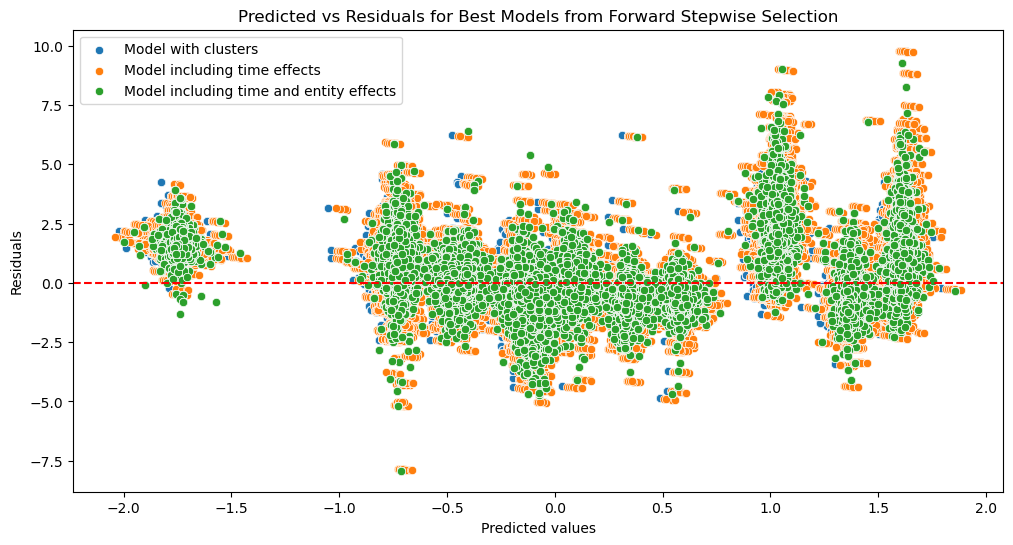

In [87]:
# Fit each model and store the results
results_dict = {}
for key, formula in fwd_sel_df.items():
    model = PanelOLS.from_formula(formula, df, drop_absorbed=True)
    results = model.fit()
    results_dict[key] = results

# Plot the predicted values vs residuals for each model
plt.figure(figsize=(12, 6))
for key, results in results_dict.items():
    predicted = results.predict().values.flatten()  # Reshape to 1D array
    residuals = results.resids.values.flatten()  # Reshape to 1D array
    sns.scatterplot(x=predicted, y=residuals, label=f'Model {key}')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Predicted vs Residuals for Best Models from Forward Stepwise Selection')
plt.legend()
plt.show()

Here we print the results of the fitted models of the best models selected.

In [88]:
for key, results in results_dict.items():
    print(f"Model {key}:")
    print(results.summary)
    print("\n")

Model with clusters:
                          PanelOLS Estimation Summary                           
Dep. Variable:                   unem   R-squared:                        0.2737
Estimator:                   PanelOLS   R-squared (Between):              0.2558
No. Observations:              380523   R-squared (Within):               0.2743
Date:                Thu, May 23 2024   R-squared (Overall):              0.2737
Time:                        18:45:18   Log-likelihood                 -6.11e+05
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                   1.793e+04
Entities:                        2299   P-value                           0.0000
Avg Obs:                       165.52   Distribution:                F(8,380515)
Min Obs:                       1.0000                                           
Max Obs:                       324.00   F-statistic (robust):          1.793e+04
       

We further compare the results side by side as follows: 

Where;

Model 0: The best model chosen using the forward selection procedure when clusters are included as dummies and no entity or time effects

Model 1: Best model selected when clusters are included, with time effects

Model 2: Best model when clusters are omitted (due to perfect collinearity), with entity and time effects.

In [89]:
# Create a list of model names for labeling
model_names = [f"Model {key}" for key in results_dict.keys()]

# Compare the models
comparison = compare(results_dict.values(), stars=True)

# Print the comparison results
comparison

,Model 0,Model 1,Model 2
Dep. Variable,unem,unem,unem
Estimator,PanelOLS,PanelOLS,PanelOLS
No. Observations,380523,380523,380523
Cov. Est.,Unadjusted,Unadjusted,Unadjusted
R-squared,0.2737,0.2736,0.2743
R-Squared (Within),0.2743,0.2741,0.2743
R-Squared (Between),0.2558,0.2747,0.2536
R-Squared (Overall),0.2737,0.2736,0.2734
F-statistic,1.793e+04,5733.5,6498.5
P-value (F-stat),0.0000,0.0000,0.0000


Next we use the backward stepwise selection procedure and model the various combinations.

### Backward stepwise selection

#### Including clusters as dummies

First we model with clusters included as dummy variables. The results are stored/saved as results_df3, with the AIC's in ascending order

In [90]:
# List of potential predictors excluding clusters, M4, and M4I
potential_predictors = ['Mini', 'Util', 'Agri']

# Fixed predictors
fixed_predictors = ['M4', 'M4I'] + cluster_dummies

# Initial full model with all predictors
initial_formula = f'unem ~ ' + ' + '.join(fixed_predictors + potential_predictors)
best_model = initial_formula
best_aic = float('inf')

# DataFrame to store results
results_df3 = pd.DataFrame(columns=['Formula', 'AIC'])

# Fit the initial model
model = PanelOLS.from_formula(initial_formula, df)
results = model.fit()
n = results.nobs
rss = np.sum(results.resids ** 2)
num_params = results.params.shape[0]
best_aic = calculate_aic(n, rss, num_params)
results_df3 = results_df3.append({'Formula': initial_formula, 'AIC': best_aic}, ignore_index=True)
# print(f'Initial model: {initial_formula}, AIC: {best_aic}')

# Backward stepwise selection
current_predictors = potential_predictors.copy()

while len(current_predictors) > 1:
    aic_with_predictor_removed = []
    
    for predictor in current_predictors:
        subset_predictors = [p for p in current_predictors if p != predictor]
        formula = f'unem ~ ' + ' + '.join(fixed_predictors + subset_predictors)
        model = PanelOLS.from_formula(formula, df)
        results = model.fit()
        n = results.nobs
        rss = np.sum(results.resids ** 2)
        num_params = results.params.shape[0]
        aic = calculate_aic(n, rss, num_params)
        aic_with_predictor_removed.append((aic, predictor, formula))
        results_df3 = results_df3.append({'Formula': formula, 'AIC': aic}, ignore_index=True)
#         print(f'Testing model: {formula}, AIC: {aic}')
    
    # Find the predictor whose removal results in the lowest AIC
    aic_with_predictor_removed.sort()
    new_best_aic, worst_predictor, best_model_formula = aic_with_predictor_removed[0]
    
    if new_best_aic < best_aic:
        best_aic = new_best_aic
        current_predictors.remove(worst_predictor)
        best_model = best_model_formula
    else:
        break

# print(f'Best model: {best_model}, AIC: {best_aic}')
results_df3 = results_df3.sort_values(by='AIC', ascending=True).reset_index(drop=True)



/var/folders/wr/k9fjy7x96svcj5th08wsq71c0000gn/T/ipykernel_70567/2138419454.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df3 = results_df3.append({'Formula': initial_formula, 'AIC': best_aic}, ignore_index=True)
/var/folders/wr/k9fjy7x96svcj5th08wsq71c0000gn/T/ipykernel_70567/2138419454.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df3 = results_df3.append({'Formula': formula, 'AIC': aic}, ignore_index=True)
/var/folders/wr/k9fjy7x96svcj5th08wsq71c0000gn/T/ipykernel_70567/2138419454.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df3 = results_df3.append({'Formula': formula, 'AIC': aic}, ignore_index=True)
/var/folders/wr/k9fjy7x96svcj5th08wsq71c0000gn/T/ipykernel_70567/2138419454

#### Including time effects

Next we include time effects in the models and save the results in results_df4. We also order the models based on AIC in ascending order.

In [91]:
# List of potential predictors excluding clusters, M4, and M4I
potential_predictors = ['Mini', 'Util', 'Agri']

# Fixed predictors
fixed_predictors = ['M4', 'M4I', 'C(TimePeriod)'] + cluster_dummies

# Initial full model with all predictors
initial_formula = f'unem ~ ' + ' + '.join(fixed_predictors + potential_predictors)
best_model = initial_formula
best_aic = float('inf')

# DataFrame to store results
results_df4 = pd.DataFrame(columns=['Formula', 'AIC'])

# Fit the initial model
model = PanelOLS.from_formula(initial_formula, df)
results = model.fit()
n = results.nobs
rss = np.sum(results.resids ** 2)
num_params = results.params.shape[0]
best_aic = calculate_aic(n, rss, num_params)
results_df4 = results_df4.append({'Formula': initial_formula, 'AIC': best_aic}, ignore_index=True)
# print(f'Initial model: {initial_formula}, AIC: {best_aic}')

# Backward stepwise selection
current_predictors = potential_predictors.copy()

while len(current_predictors) > 1:
    aic_with_predictor_removed = []
    
    for predictor in current_predictors:
        subset_predictors = [p for p in current_predictors if p != predictor]
        formula = f'unem ~ ' + ' + '.join(fixed_predictors + subset_predictors)
        model = PanelOLS.from_formula(formula, df)
        results = model.fit()
        n = results.nobs
        rss = np.sum(results.resids ** 2)
        num_params = results.params.shape[0]
        aic = calculate_aic(n, rss, num_params)
        aic_with_predictor_removed.append((aic, predictor, formula))
        results_df4 = results_df4.append({'Formula': formula, 'AIC': aic}, ignore_index=True)
#         print(f'Testing model: {formula}, AIC: {aic}')
    
    # Find the predictor whose removal results in the lowest AIC
    aic_with_predictor_removed.sort()
    new_best_aic, worst_predictor, best_model_formula = aic_with_predictor_removed[0]
    
    if new_best_aic < best_aic:
        best_aic = new_best_aic
        current_predictors.remove(worst_predictor)
        best_model = best_model_formula
    else:
        break

        
# print(f'Best model: {best_model}, AIC: {best_aic}')
results_df4 = results_df4.sort_values(by='AIC', ascending=True).reset_index(drop=True)



/var/folders/wr/k9fjy7x96svcj5th08wsq71c0000gn/T/ipykernel_70567/512822084.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df4 = results_df4.append({'Formula': initial_formula, 'AIC': best_aic}, ignore_index=True)
/var/folders/wr/k9fjy7x96svcj5th08wsq71c0000gn/T/ipykernel_70567/512822084.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df4 = results_df4.append({'Formula': formula, 'AIC': aic}, ignore_index=True)
/var/folders/wr/k9fjy7x96svcj5th08wsq71c0000gn/T/ipykernel_70567/512822084.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df4 = results_df4.append({'Formula': formula, 'AIC': aic}, ignore_index=True)
/var/folders/wr/k9fjy7x96svcj5th08wsq71c0000gn/T/ipykernel_70567/512822084.py:

#### Including entity and time effects (no clusters due to perfect collinearity)

Finally, we include both entity and time effects in the models. The results are saved in results_df5.

In [92]:
# Fixed predictors
fixed_predictors = ['M4', 'M4I', 'C(TimePeriod)', 'EntityEffects'] + cluster_dummies

# Initial full model with all predictors
initial_formula = f'unem ~ ' + ' + '.join(fixed_predictors + potential_predictors)
best_model = initial_formula
best_aic = float('inf')

# DataFrame to store results
results_df5 = pd.DataFrame(columns=['Formula', 'AIC'])

# Fit the initial model
model = PanelOLS.from_formula(initial_formula, df, drop_absorbed=True)
results = model.fit()
n = results.nobs
rss = np.sum(results.resids ** 2)
num_params = results.params.shape[0]
best_aic = calculate_aic(n, rss, num_params)
results_df5 = results_df5.append({'Formula': initial_formula, 'AIC': best_aic}, ignore_index=True)
# print(f'Initial model: {initial_formula}, AIC: {best_aic}')

# Backward stepwise selection
current_predictors = potential_predictors.copy()

while len(current_predictors) > 1:
    aic_with_predictor_removed = []
    
    for predictor in current_predictors:
        subset_predictors = [p for p in current_predictors if p != predictor]
        formula = f'unem ~ ' + ' + '.join(fixed_predictors + subset_predictors)
        model = PanelOLS.from_formula(formula, df, drop_absorbed=True)
        results = model.fit()
        n = results.nobs
        rss = np.sum(results.resids ** 2)
        num_params = results.params.shape[0]
        aic = calculate_aic(n, rss, num_params)
        aic_with_predictor_removed.append((aic, predictor, formula))
        results_df5 = results_df5.append({'Formula': formula, 'AIC': aic}, ignore_index=True)
#         print(f'Testing model: {formula}, AIC: {aic}')
    
    # Find the predictor whose removal results in the lowest AIC
    aic_with_predictor_removed.sort()
    new_best_aic, worst_predictor, best_model_formula = aic_with_predictor_removed[0]
    
    if new_best_aic < best_aic:
        best_aic = new_best_aic
        current_predictors.remove(worst_predictor)
        best_model = best_model_formula
    else:
        break

        
#print(f'Best model: {best_model}, AIC: {best_aic}')
results_df5 = results_df5.sort_values(by='AIC', ascending=True).reset_index(drop=True)


/var/folders/wr/k9fjy7x96svcj5th08wsq71c0000gn/T/ipykernel_70567/2507690407.py:14: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

clusters_2.0, clusters_3.0, clusters_4.0

  results = model.fit()
/var/folders/wr/k9fjy7x96svcj5th08wsq71c0000gn/T/ipykernel_70567/2507690407.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df5 = results_df5.append({'Formula': initial_formula, 'AIC': best_aic}, ignore_index=True)
/var/folders/wr/k9fjy7x96svcj5th08wsq71c0000gn/T/ipykernel_70567/2507690407.py:32: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

clusters_2.0, clusters_3.0, clusters_4.0

  results = model.fit()
/var/folders/wr/k9fjy7x96svcj5th08wsq71c0000gn/T/ipykernel_70567/2507690407.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version

Next we display the results of the various combinations of the backward selection methods. With each being arranged in ascending order of the AIC's

#### Backward selection results

#### Including clusters

In [93]:
results_df3

,Formula,AIC
0,unem ~ M4 + M4I + clusters_2.0 + clusters_3.0 + clusters_4.0 + Mini + Util + Agri,142233.704891
1,unem ~ M4 + M4I + clusters_2.0 + clusters_3.0 + clusters_4.0 + Mini + Agri,142252.251172
2,unem ~ M4 + M4I + clusters_2.0 + clusters_3.0 + clusters_4.0 + Mini + Util,142301.183379
3,unem ~ M4 + M4I + clusters_2.0 + clusters_3.0 + clusters_4.0 + Util + Agri,142480.751812


#### Including time effects

In [94]:
results_df4

,Formula,AIC
0,unem ~ M4 + M4I + C(TimePeriod) + clusters_2.0 + clusters_3.0 + clusters_4.0 + Mini + Util + Agri,141815.946132
1,unem ~ M4 + M4I + C(TimePeriod) + clusters_2.0 + clusters_3.0 + clusters_4.0 + Mini + Agri,141833.860209
2,unem ~ M4 + M4I + C(TimePeriod) + clusters_2.0 + clusters_3.0 + clusters_4.0 + Mini + Util,141883.148756
3,unem ~ M4 + M4I + C(TimePeriod) + clusters_2.0 + clusters_3.0 + clusters_4.0 + Util + Agri,142059.396453


#### Including time and entity effects

In [95]:
results_df5

,Formula,AIC
0,unem ~ M4 + M4I + C(TimePeriod) + EntityEffects + clusters_2.0 + clusters_3.0 + clusters_4.0 + Mini + Util + Agri,133073.086512
1,unem ~ M4 + M4I + C(TimePeriod) + EntityEffects + clusters_2.0 + clusters_3.0 + clusters_4.0 + Mini + Agri,133093.217064
2,unem ~ M4 + M4I + C(TimePeriod) + EntityEffects + clusters_2.0 + clusters_3.0 + clusters_4.0 + Mini + Util,133140.424481
3,unem ~ M4 + M4I + C(TimePeriod) + EntityEffects + clusters_2.0 + clusters_3.0 + clusters_4.0 + Util + Agri,133308.608393


Now we create a dictionary to store the results of the fitted models of the best models from each of the combinations

In [96]:
bck_sel_df = {}

# First stepwise selection
bck_sel_df['with clusters'] = results_df3.iloc[0]['Formula']

# Second stepwise selection
bck_sel_df['including time effects'] = results_df4.iloc[0]['Formula']

# Third stepwise selection
bck_sel_df['including time and entity effects'] = results_df5.iloc[0]['Formula']

Here we fit the best(chosen) models and plot the results.

/var/folders/wr/k9fjy7x96svcj5th08wsq71c0000gn/T/ipykernel_70567/402357648.py:5: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

clusters_2.0, clusters_3.0, clusters_4.0

  results = model.fit()


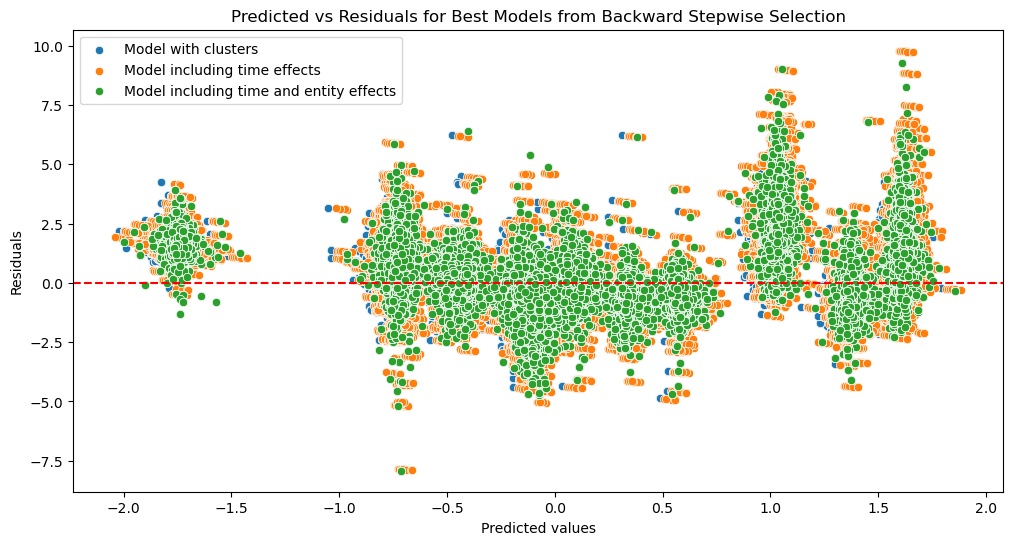

In [97]:
# Fit each model and store the results
results_dict2 = {}
for key, formula in bck_sel_df.items():
    model = PanelOLS.from_formula(formula, df, drop_absorbed=True)
    results = model.fit()
    results_dict2[key] = results

# Plot the predicted values vs residuals for each model
plt.figure(figsize=(12, 6))
for key, results in results_dict2.items():
    predicted = results.predict().values.flatten()  # Reshape to 1D array
    residuals = results.resids.values.flatten()  # Reshape to 1D array
    sns.scatterplot(x=predicted, y=residuals, label=f'Model {key}')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Predicted vs Residuals for Best Models from Backward Stepwise Selection')
plt.legend()
plt.show()

The following code displays the summary of the best models.

In [98]:
for key, results in results_dict2.items():
    print(f"Model {key}:")
    print(results.summary)
    print("\n")

Model with clusters:
                          PanelOLS Estimation Summary                           
Dep. Variable:                   unem   R-squared:                        0.2737
Estimator:                   PanelOLS   R-squared (Between):              0.2558
No. Observations:              380523   R-squared (Within):               0.2743
Date:                Thu, May 23 2024   R-squared (Overall):              0.2737
Time:                        18:45:35   Log-likelihood                 -6.11e+05
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                   1.793e+04
Entities:                        2299   P-value                           0.0000
Avg Obs:                       165.52   Distribution:                F(8,380515)
Min Obs:                       1.0000                                           
Max Obs:                       324.00   F-statistic (robust):          1.793e+04
       

Finally we compare the models side by side. 

Model 0: The best model chosen using the backward selection procedure when clusters are included as dummies and no entity or time effects

Model 1: Best model selected when clusters are included, with time effects

Model 2: Best model when clusters are omitted (due to perfect collinearity), with entity and time effects.

In [99]:
comparison = compare(results_dict2.values(), stars=True)
comparison

,Model 0,Model 1,Model 2
Dep. Variable,unem,unem,unem
Estimator,PanelOLS,PanelOLS,PanelOLS
No. Observations,380523,380523,380523
Cov. Est.,Unadjusted,Unadjusted,Unadjusted
R-squared,0.2737,0.2736,0.2743
R-Squared (Within),0.2743,0.2741,0.2743
R-Squared (Between),0.2558,0.2747,0.2536
R-Squared (Overall),0.2737,0.2736,0.2734
F-statistic,1.793e+04,5733.5,6498.5
P-value (F-stat),0.0000,0.0000,0.0000


#### Extracting the mixed effects and fixed effects results and tabulating them

In [106]:
# # Extract results for the fixed effects model
# fe_params = r_fe.params
# fe_bse = r_fe.std_errors
# fe_tvalues = r_fe.tstats
# fe_pvalues = r_fe.pvalues

# # Create a summary DataFrame for the fixed effects model
# fe_summary = pd.DataFrame({
#     'Coef.': fe_params,
#     'Std.Err.': fe_bse,
#     #'t': fe_tvalues,
#     'P>|t|': fe_pvalues
# })

# # Extract results for the mixed effects model with group=clusters
# me_params = r_me1.params
# me_bse = r_me1.bse
# me_tvalues = r_me1.tvalues
# me_pvalues = r_me1.pvalues

# # Create a summary DataFrame for the mixed effects model
# me_summary = pd.DataFrame({
#     'Coef.': me_params,
#     'Std.Err.': me_bse,
#     #'t': me_tvalues,
#     'P>|t|': me_pvalues
# })

# # Extract results for the mixed effects model with group=fipcodes
# me2_params = r_me2.params
# me2_bse = r_me2.bse
# me2_tvalues = r_me2.tvalues
# me2_pvalues = r_me2.pvalues

# # Create a summary DataFrame for the model
# me2_summary = pd.DataFrame({
#     'Coef.': me2_params,
#     'Std.Err.': me2_bse,
#     #'t': me2_tvalues,
#     'P>|t|': me2_pvalues
# })

# fe_summary=fe_summary.round(4)
# me_summary=me_summary.round(4)
# me2_summary=me2_summary.round(4)

# # Combine the summaries into a single DataFrame for comparison
# comparison_summary = pd.concat([fe_summary, me_summary, me2_summary], 
#                                keys=['Fixed Effects',
#                                      'Mixed Effects(group=clusters)',
#                                      'Mixed Effects(group=fipcodes)'], axis=1)
# comparison_summary


In [107]:
# hausman_test(r_fe, r_me1, r_me2).round(3)

#### Panel VAR

In [108]:
# # Initialize lists to store the results
# lag_orders = []
# aic_values = []
# bic_values = []

# # Loop over a range of lag orders
# for i in range(1, 11):
#     m1 = VAR(df)
#     results = m1.fit(i)
#     lag_orders.append(i)
#     aic_values.append(results.aic)
#     bic_values.append(results.bic)

# # Create a DataFrame to store the results
# comparison_df = pd.DataFrame({
#     'Lag Order': lag_orders,
#     'AIC': aic_values,
#     'BIC': bic_values
# })

# # Display the comparison DataFrame
# comparison_df

In [109]:
# r_var1 = m1.fit(2)

# r_var1.summary()

In [110]:
# # Initialize a dictionary to store the results
# results_dict = {}

# # Loop over a range of lag orders
# for i in range(1, 11):
#     m1 = VAR(df)
#     r_var = m1.fit(i)
#     results_dict[f'Lag {i}'] = r_var


In [111]:
# # Function to extract coefficients, standard errors, t-values, and p-values
# def extract_results(results, lag):
#     summary_dict = {}
#     for variable in results.params.columns:
#         for dependent in results.params.index:
#             key = f'{dependent} ~ {variable} (Lag {lag})'
#             summary_dict[key] = {
#                 'Coef.': results.params.loc[dependent, variable],
#                 'Std.Err.': results.bse.loc[dependent, variable],
#                 't': results.tvalues.loc[dependent, variable],
#                 'P>|t|': results.pvalues.loc[dependent, variable]
#             }
#     return summary_dict

# # Initialize a list to store all the results
# all_results = []

# # Loop over the results dictionary to extract and combine the results
# for lag, res in results_dict.items():
#     all_results.append(pd.DataFrame(extract_results(res, lag)).T)

# # Combine all results into a DataFrame
# comparison_df = pd.concat(all_results)

# comparison_df = comparison_df.round(4)

# comparison_df
